In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [4]:
import pyrosetta as py
py.init()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2019.01+HEAD.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=849340031 seed_offset=0 real_seed=849340031
core.init.random: RandomGenerator:init: Normal mode, seed=849340031 RG_type=mt19937


In [5]:
df = pd.read_pickle('picked_networks.pickle')
df.shape

(2747, 8)

In [20]:
print(df)

                                     tyrs  n_res_network  n_hbonds  \
description                                                          
0__input_0001_0002_1_0004_0001_0001   1.0           14.0      16.0   
0__input_0001_0002_1_0004_0001_0003   1.0           10.0      12.0   
0__input_0001_0002_1_0004_0001_0008   1.0           10.0      10.0   
0__input_0001_0002_2_0004_0002_0002   1.0           12.0      12.0   
0__input_0001_0004_1_0001_0007_0007   1.0            8.0       8.0   
0__input_0001_0004_2_0002_0001_0006   1.0            7.0       6.0   
0__input_0001_0004_2_0002_0001_0007   1.0            6.0       6.0   
0__input_0001_0004_2_0003_0009_0006   1.0           10.0      11.0   
0__input_0001_0004_4_0004             1.0            9.0       9.0   
0__input_0001_0004_5_0002_0002_0001   2.0           10.0      12.0   
0__input_0001_0004_5_0002_0002_0002   2.0            7.0       8.0   
0__input_0001_0004_5_0002_0002_0004   2.0            7.0       8.0   
0__input_0001_0004_5

In [4]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('round3_surf/*__input_*/score.sc')], ignore_index = True)
print(dall_scores)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0      SCORE:     -355.841        0.0 -600.411  129.353 -280.556   
1      SCORE:     -359.511        0.0 -606.109  130.257 -271.392   
2      SCORE:     -357.611        0.0 -602.064  131.898 -273.428   
3      SCORE:     -354.917        0.0 -602.839  131.617 -284.729   
4      SCORE:     -354.223        0.0 -599.131  132.668 -275.850   
5      SCORE:     -357.112        0.0 -602.081  133.103 -276.690   
6      SCORE:     -358.734        0.0 -599.376  132.134 -275.648   
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
8      SCORE:     -351.836        0.0 -597.921  131.746 -279.636   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
10     SCORE:     -352.999        0.0 -609.860  129.040 -274.937   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
12     SCORE:     -357.568        0.0 -603.953  121.503 -272.369   
13     SCORE:     -357.401        0.0 -619.184  

In [5]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('round3_surf/*__input_*/score.sc')], ignore_index = True)
print(dscore_per_design)


      total_score  dslf_fa13    fa_atr    fa_dun   fa_elec  fa_intra_rep  \
0       -355.7385        0.0 -602.3720  130.2324 -277.2080        1.2212   
1       -355.8913        0.0 -606.5031  123.5666 -273.1431        1.2120   
2       -359.6112        0.0 -600.0175  120.2029 -281.5767        1.3193   
3       -361.1783        0.0 -595.5168  121.8277 -271.7331        1.2565   
4       -374.4372        0.0 -625.1850  130.4503 -260.6140        1.2407   
5       -363.2428        0.0 -627.8086  136.8189 -282.8708        1.2610   
6       -359.7615        0.0 -591.2959  126.1083 -274.8746        1.1120   
7       -346.6600        0.0 -597.1477  125.1170 -290.1279        1.1393   
8       -354.3248        0.0 -621.4134  138.5877 -267.5596        1.2368   
9       -358.2891        0.0 -611.2994  123.9765 -256.4622        1.3139   
10      -349.6713        0.0 -586.2739  113.9061 -248.1775        1.2004   
11      -344.9564        0.0 -607.1234  129.5360 -273.3740        1.2571   
12      -370

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


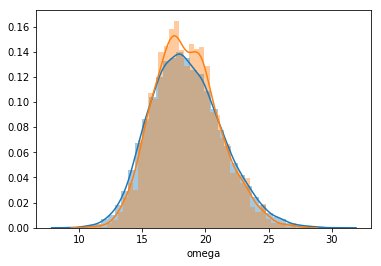

In [6]:
sns.distplot(dall_scores["omega"], bins=40)
sns.distplot(dscore_per_design["omega"], bins=40)

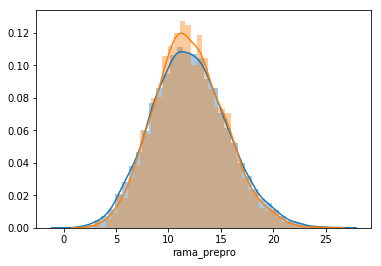

In [7]:
sns.distplot(dall_scores["rama_prepro"], bins=40)
sns.distplot(dscore_per_design["rama_prepro"], bins=40)

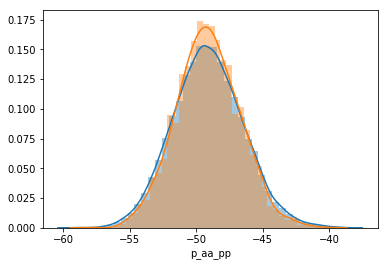

In [8]:
sns.distplot(dall_scores["p_aa_pp"], bins=40)
sns.distplot(dscore_per_design["p_aa_pp"], bins=40)

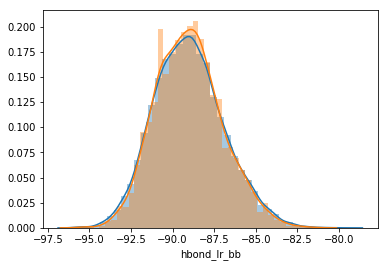

In [9]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=40)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=40)

In [5]:
hbond_dict = {}
for index,row in df.iterrows():
    hbonds = []
    my_regex = r"\# " + index + r"_0001_native_network_[1-9].cst\n\# \n"
    cst = re.split(my_regex,row["network_cst"])
    for net in cst:
        if net != "":
            tyr_10 = False
            tyr_68 = False
            if " OH  10 " in net:
                tyr_10 = True
            if " OH  68 " in net:
                tyr_68 = True
            lines = net.split('\n')
            for line in lines:
                if "AtomPair " in line:
                    acc_res = int(line.split()[2])
                    don_res = int(line.split()[4])
                    acc_atm = line.split()[1]
                    don_atm = line.split()[3]
                    if acc_atm not in ["CB","N","CA","O"] and don_atm not in ["CB","N","CA","O"]:
                        hbonds.append((acc_res,don_res,acc_atm,don_atm,tyr_10,tyr_68))
    hbond_dict[index] = hbonds
print(hbond_dict)

{'0__input_0001_0002_1_0004_0001_0001': [(24, 10, 'OE2', 'OH', True, False), (16, 22, 'OD2', 'NE', True, False), (18, 22, 'OD2', 'NH2', True, False), (18, 110, 'OD2', 'NZ', True, False), (18, 110, 'OD1', 'NZ', True, False), (106, 22, 'OE2', 'NH1', True, False), (112, 22, 'OE1', 'NH1', True, False), (24, 52, 'OE1', 'NZ', True, False), (112, 52, 'OE2', 'NZ', True, False), (76, 48, 'OE1', 'NZ', False, False), (76, 74, 'OE2', 'NZ', False, False), (108, 74, 'OD2', 'NZ', False, False), (76, 80, 'OE1', 'NH1', False, False), (108, 80, 'OD2', 'NH1', False, False), (108, 80, 'OD1', 'NH2', False, False)], '0__input_0001_0002_1_0004_0001_0003': [(24, 10, 'OE2', 'OH', True, False), (10, 38, 'OH', 'NH1', True, False), (24, 38, 'OE2', 'NH1', True, False), (24, 52, 'OE1', 'NZ', True, False), (70, 38, 'OD2', 'NE', True, False), (70, 38, 'OD1', 'NH2', True, False), (76, 48, 'OE1', 'NZ', False, False), (50, 82, 'OE1', 'NZ', False, False), (76, 82, 'OE2', 'NZ', False, False), (106, 82, 'OD2', 'NZ', False,

In [24]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
dretained = pd.DataFrame(columns=['%_retained','%_retained_tyr'])

for index,row in df.iterrows():
    interactions = hbond_dict[index]
    interact_res = Counter([inter[0:2] for inter in interactions])
    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
    num_interactions = float(len(list(interact_res.elements())))
    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
    curr_retention = []
    curr_retention_tyr = []
    for pdb in glob.glob("round3_surf/" + index + "/" + index + "_*.pdb"):
        current_inter_list = []
        pose = py.pose_from_pdb(pdb)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for i in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
        current_inter = Counter(current_inter_list)
        num_curr_inter = 0.0
        num_curr_inter_tyr = 0.0
        for inter in current_inter:
            if inter in interact_res:
                if current_inter[inter] >= interact_res[inter]:
                    num_curr_inter += interact_res[inter]
                elif current_inter[inter] < interact_res[inter]:
                    num_curr_inter += current_inter[inter]
                    
            if inter in interact_res_tyr:
                if current_inter[inter] >= interact_res_tyr[inter]:
                    num_curr_inter_tyr += interact_res_tyr[inter]
                elif current_inter[inter] < interact_res_tyr[inter]:
                    num_curr_inter_tyr += current_inter[inter]
        curr_retention.append(num_curr_inter/num_interactions)
        curr_retention_tyr.append(num_curr_inter_tyr/num_interactions_tyr)
    dretained.loc[index] = [sum(curr_retention)/len(curr_retention), sum(curr_retention_tyr)/len(curr_retention_tyr)]
print(dretained)
        
        
#                        print(pose.residue(hbond_set.hbond(i).don_res()).atom_name(pose.residue(hbond_set.hbond(i).don_res()).first_adjacent_heavy_atom(hbond_set.hbond(i).don_hatm())))
                

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0002_1_0004_0001_0001/0__input_0001_0002_1_0004_0001_0001_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_1_0001_0007_0007/0__input_0001_0004_1_0001_0007_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_1_0001_0007_0007/0__input_0001_0004_1_0001_0007_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_2_0002_0001_0006/0__input_0001_0004_2_0002_0001_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_2_0002_0001_0006/0__input_0001_0004_2_0002_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_2_0002_0001_0006/0__input_0001_0004_2_0002_0001_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_2_0002_0001_0006/0__input_0001_0004_2_0002_0001_0006_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0001/0__input_0001_0004_5_0002_0002_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0001/0__input_0001_0004_5_0002_0002_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0001/0__input_0001_0004_5_0002_0002_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0002/0__input_0001_0004_5_0002_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0002/0__input_0001_0004_5_0002_0002_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0002/0__input_0001_0004_5_0002_0002_0002_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0009/0__input_0001_0004_5_0002_0002_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0009/0__input_0001_0004_5_0002_0002_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0009/0__input_0001_0004_5_0002_0002_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0009/0__input_0001_0004_5_0002_0002_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0009/0__input_0001_0004_5_0002_0002_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0004_5_0002_0002_0010/0__input_0001_0004_5_0002_0002_0010_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_2_0003_0004_0006/0__input_0001_0005_2_0003_0004_0006_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002/0__input_0001_0005_4_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0006/0__input_0001_0005_4_0002_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0007/0__input_0001_0005_4_0002_0002_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0007/0__input_0001_0005_4_0002_0002_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0007/0__input_0001_0005_4_0002_0002_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0007/0__input_0001_0005_4_0002_0002_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0002_0002_0007/0__input_0001_0005_4_0002_0002_0007_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0002/0__input_0001_0005_4_0003_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0002/0__input_0001_0005_4_0003_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0002/0__input_0001_0005_4_0003_0002_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0004/0__input_0001_0005_4_0003_0002_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0004/0__input_0001_0005_4_0003_0002_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0004/0__input_0001_0005_4_0003_0002_0004_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0008/0__input_0001_0005_4_0003_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0008/0__input_0001_0005_4_0003_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0008/0__input_0001_0005_4_0003_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0008/0__input_0001_0005_4_0003_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0008/0__input_0001_0005_4_0003_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0003_0002_0009/0__input_0001_0005_4_0003_0002_0009_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_4_0004_0006_0006/0__input_0001_0005_4_0004_0006_0006_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/0__input_0001_0005_5_0001_0010_0001/0__input_0001_0005_5_0001_0010_0001_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0001_1_0004_0002/10__input_0109_0001_1_0004_0002_0010.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_3_0002_0001_0005/10__input_0109_0002_3_0002_0001_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_3_0002_0001_0005/10__input_0109_0002_3_0002_0001_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0003_0009_0003/10__input_0109_0002_4_0003_0009_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0003_0009_0003/10__input_0109_0002_4_0003_0009_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0003_0009_0003/10__input_0109_0002_4_0003_0009_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0003_0009_0003/10__input_0109_0002_4_0003_0009_0003_000

core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0001/10__input_0109_0002_4_0004_0009_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0001/10__input_0109_0002_4_0004_0009_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0001/10__input_0109_0002_4_0004_0009_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0001/10__input_0109_0002_4_0004_0009_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0001/10__input_0109_0002_4_0004_0009_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0002_4_0004_0009_0004/10__input_0109_0002_4_0004_0009_0004_000

core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/10__input_0109_0003_1_0004_0001_0008/10__input_0109_0003_1_0004_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0004/11__input_0191_0001_1_0003_0009_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0007/11__input_0191_0001_1_0003_0009_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0007/11__input_0191_0001_1_0003_0009_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0007/11__input_0191_0001_1_0003_0009_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0007/11__input_0191_0001_1_0003_0009_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_1_0003_0009_0007/11__input_0191_0001_1_0003_0009_0007_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0005/11__input_0191_0001_2_0002_0010_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0005/11__input_0191_0001_2_0002_0010_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0005/11__input_0191_0001_2_0002_0010_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0009/11__input_0191_0001_2_0002_0010_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0009/11__input_0191_0001_2_0002_0010_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0002_0010_0009/11__input_0191_0001_2_0002_0010_0009_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0004/11__input_0191_0001_2_0003_0004_0004_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_2_0003_0004_0009/11__input_0191_0001_2_0003_0004_0009_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0001/11__input_0191_0001_5_0001_0002_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0001/11__input_0191_0001_5_0001_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0002/11__input_0191_0001_5_0001_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0002/11__input_0191_0001_5_0001_0002_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0002/11__input_0191_0001_5_0001_0002_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0002/11__input_0191_0001_5_0001_0002_0002_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0007/11__input_0191_0001_5_0001_0002_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0007/11__input_0191_0001_5_0001_0002_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0007/11__input_0191_0001_5_0001_0002_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0007/11__input_0191_0001_5_0001_0002_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0007/11__input_0191_0001_5_0001_0002_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0001_0002_0008/11__input_0191_0001_5_0001_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0003_0005_0005/11__input_0191_0001_5_0003_0005_0005_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0001_5_0005_0007_0009/11__input_0191_0001_5_0005_0007_0009_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0003/11__input_0191_0003_1_0001_0001_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0003/11__input_0191_0003_1_0001_0001_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0003/11__input_0191_0003_1_0001_0001_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0004/11__input_0191_0003_1_0001_0001_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0004/11__input_0191_0003_1_0001_0001_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0004/11__input_0191_0003_1_0001_0001_0004_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_1_0001_0001_0009/11__input_0191_0003_1_0001_0001_0009_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0002_0002_0006/11__input_0191_0003_3_0002_0002_0006_001

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_3_0003_0010_0003/11__input_0191_0003_3_0003_0010_0003_001

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005/11__input_0191_0003_4_0001_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005/11__input_0191_0003_4_0001_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0001/11__input_0191_0003_4_0001_0005_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0001/11__input_0191_0003_4_0001_0005_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0001/11__input_0191_0003_4_0001_0005_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0001/11__input_0191_0003_4_0001_0005_0001_0001.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0005/11__input_0191_0003_4_0001_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0005/11__input_0191_0003_4_0001_0005_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0005/11__input_0191_0003_4_0001_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0005/11__input_0191_0003_4_0001_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0005/11__input_0191_0003_4_0001_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_4_0001_0005_0006/11__input_0191_0003_4_0001_0005_0006_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006/11__input_0191_0003_5_0002_0006_0002.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0006/11__input_0191_0003_5_0002_0006_0006_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0003_5_0002_0006_0010/11__input_0191_0003_5_0002_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_1_0001_0002_0005/11__input_0191_0004_1_0001_0002_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_1_0001_0002_0005/11__input_0191_0004_1_0001_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_1_0001_0002_0005/11__input_0191_0004_1_0001_0002_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_1_0001_0002_0005/11__input_0191_0004_1_0001_0002_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_1_0001_0002_0005/11__input_0191_0004_1_0001_0002_0005_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_3_0004_0009_0010/11__input_0191_0004_3_0004_0009_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_3_0004_0009_0010/11__input_0191_0004_3_0004_0009_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_3_0004_0009_0010/11__input_0191_0004_3_0004_0009_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_3_0004_0009_0010/11__input_0191_0004_3_0004_0009_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_5_0003_0002_0001/11__input_0191_0004_5_0003_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_5_0003_0002_0001/11__input_0191_0004_5_0003_0002_0001_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0004_6_0005_0002_0003/11__input_0191_0004_6_0005_0002_0003_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_1_0005_0005/11__input_0191_0005_1_0005_0005_0003.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_3_0004_0005_0007/11__input_0191_0005_3_0004_0005_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001/11__input_0191_0005_4_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0003/11__input_0191_0005_4_0001_0008_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0003/11__input_0191_0005_4_0001_0008_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0004/11__input_0191_0005_4_0001_0008_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0004/11__input_0191_0005_4_0001_0008_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0004/11__input_0191_0005_4_0001_0008_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0004/11__input_0191_0005_4_0001_0008_0004_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0008/11__input_0191_0005_4_0001_0008_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0008/11__input_0191_0005_4_0001_0008_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0008/11__input_0191_0005_4_0001_0008_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0008/11__input_0191_0005_4_0001_0008_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0008/11__input_0191_0005_4_0001_0008_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0001_0008_0009/11__input_0191_0005_4_0001_0008_0009_000

core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/11__input_0191_0005_4_0004_0002_0010/11__input_0191_0005_4_0004_0002_0010_000

core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0002_1_0003_0009_0009/12__input_0050_0002_1_0003_0009_0009_000

core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0005/12__input_0050_0004_1_0002_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0005/12__input_0050_0004_1_0002_0008_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0006/12__input_0050_0004_1_0002_0008_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0006/12__input_0050_0004_1_0002_0008_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0006/12__input_0050_0004_1_0002_0008_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/12__input_0050_0004_1_0002_0008_0006/12__input_0050_0004_1_0002_0008_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0002_0007_0007/13__input_0017_0005_2_0002_0007_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0002_0007_0007/13__input_0017_0005_2_0002_0007_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0002_0007_0007/13__input_0017_0005_2_0002_0007_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0002_0007_0007/13__input_0017_0005_2_0002_0007_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0002_0007_0007/13__input_0017_0005_2_0002_0007_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001/13__input_0017_0005_2_0005_0001_0007.pdb' aut

core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0017_0005_2_0005_0001_0008/13__input_0017_0005_2_0005_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_1_0005_0008_0001/13__input_0110_0001_1_0005_0008_0001_000

core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0004_0001_0008/13__input_0110_0001_2_0004_0001_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0004_0001_0008/13__input_0110_0001_2_0004_0001_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0005_0008_0001/13__input_0110_0001_2_0005_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0005_0008_0001/13__input_0110_0001_2_0005_0008_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0005_0008_0001/13__input_0110_0001_2_0005_0008_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0001_2_0005_0008_0001/13__input_0110_0001_2_0005_0008_0001_000

core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0003_0005_0009/13__input_0110_0002_1_0003_0005_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0003_0005_0009/13__input_0110_0002_1_0003_0005_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0001/13__input_0110_0002_1_0004_0005_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0001/13__input_0110_0002_1_0004_0005_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0001/13__input_0110_0002_1_0004_0005_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0001/13__input_0110_0002_1_0004_0005_0001_000

core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0008/13__input_0110_0002_1_0004_0005_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0008/13__input_0110_0002_1_0004_0005_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0008/13__input_0110_0002_1_0004_0005_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0008/13__input_0110_0002_1_0004_0005_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_1_0004_0005_0008/13__input_0110_0002_1_0004_0005_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0110_0002_2_0002_0006_0009/13__input_0110_0002_2_0002_0006_0009_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0002_0010_0005/13__input_0135_0001_1_0002_0010_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0002_0010_0005/13__input_0135_0001_1_0002_0010_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0002_0010_0005/13__input_0135_0001_1_0002_0010_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0002_0010_0005/13__input_0135_0001_1_0002_0010_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0002_0010_0005/13__input_0135_0001_1_0002_0010_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0001_1_0004_0008_0003/13__input_0135_0001_1_0004_0008_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0002_1_0003_0009_0003/13__input_0135_0002_1_0003_0009_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_1_0002_0001_0010/13__input_0135_0004_1_0002_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0004/13__input_0135_0004_3_0002_0009_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0004/13__input_0135_0004_3_0002_0009_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0005/13__input_0135_0004_3_0002_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0005/13__input_0135_0004_3_0002_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0005/13__input_0135_0004_3_0002_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0004_3_0002_0009_0005/13__input_0135_0004_3_0002_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0001/13__input_0135_0005_1_0001_0003_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0001/13__input_0135_0005_1_0001_0003_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0001/13__input_0135_0005_1_0001_0003_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0001/13__input_0135_0005_1_0001_0003_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0003/13__input_0135_0005_1_0001_0003_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0001_0003_0003/13__input_0135_0005_1_0001_0003_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0003_0001_0001/13__input_0135_0005_1_0003_0001_0001_000

core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0135_0005_1_0005_0008_0005/13__input_0135_0005_1_0005_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0002_0009_0005/13__input_0157_0001_2_0002_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0002_0009_0005/13__input_0157_0001_2_0002_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0003_0006_0006/13__input_0157_0001_2_0003_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0003_0006_0006/13__input_0157_0001_2_0003_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0003_0006_0006/13__input_0157_0001_2_0003_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0003_0006_0006/13__input_0157_0001_2_0003_0006_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0004/13__input_0157_0001_2_0004_0009_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0004/13__input_0157_0001_2_0004_0009_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0004/13__input_0157_0001_2_0004_0009_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0005/13__input_0157_0001_2_0004_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0005/13__input_0157_0001_2_0004_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_2_0004_0009_0005/13__input_0157_0001_2_0004_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003/13__input_0157_0001_4_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003/13__input_0157_0001_4_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003/13__input_0157_0001_4_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003/13__input_0157_0001_4_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003/13__input_0157_0001_4_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0003_0001/13__input_0157_0001_4_0003_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_01

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0001_4_0004_0007_0008/13__input_0157_0001_4_0004_0007_0008_000

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0004_1_0001_0003_0008/13__input_0157_0004_1_0001_0003_0008_000

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008/13__input_0157_0005_2_0001_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0004/13__input_0157_0005_2_0001_0008_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0004/13__input_0157_0005_2_0001_0008_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0004/13__input_0157_0005_2_0001_0008_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0004/13__input_0157_0005_2_0001_0008_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0004/13__input_0157_0005_2_0001_0008_0004_0007.pdb' aut

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0008/13__input_0157_0005_2_0001_0008_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0008/13__input_0157_0005_2_0001_0008_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0008/13__input_0157_0005_2_0001_0008_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0001_0008_0008/13__input_0157_0005_2_0001_0008_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002/13__input_0157_0005_2_0004_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002/13__input_0157_0005_2_0004_0002_0002.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0157_0005_2_0004_0002_0005/13__input_0157_0005_2_0004_0002_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_1_0003_0002/13__input_0166_0001_1_0003_0002_0002.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0001/13__input_0166_0001_4_0002_0004_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0003/13__input_0166_0001_4_0002_0004_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0003/13__input_0166_0001_4_0002_0004_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0003/13__input_0166_0001_4_0002_0004_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0003/13__input_0166_0001_4_0002_0004_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0003/13__input_0166_0001_4_0002_0004_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0007/13__input_0166_0001_4_0002_0004_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0007/13__input_0166_0001_4_0002_0004_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0007/13__input_0166_0001_4_0002_0004_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0007/13__input_0166_0001_4_0002_0004_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0008/13__input_0166_0001_4_0002_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0002_0004_0008/13__input_0166_0001_4_0002_0004_0008_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0004_0010_0001/13__input_0166_0001_4_0004_0010_0001_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006/13__input_0166_0001_4_0005_0006_0009.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0006/13__input_0166_0001_4_0005_0006_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0006/13__input_0166_0001_4_0005_0006_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0007/13__input_0166_0001_4_0005_0006_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0007/13__input_0166_0001_4_0005_0006_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0007/13__input_0166_0001_4_0005_0006_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0001_4_0005_0006_0007/13__input_0166_0001_4_0005_0006_0007_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0002/13__input_0166_0002_1_0003_0006_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0002/13__input_0166_0002_1_0003_0006_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0002/13__input_0166_0002_1_0003_0006_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0002/13__input_0166_0002_1_0003_0006_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0002/13__input_0166_0002_1_0003_0006_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0003/13__input_0166_0002_1_0003_0006_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0003_0006_0008/13__input_0166_0002_1_0003_0006_0008_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_1_0005_0010_0008/13__input_0166_0002_1_0005_0010_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_2_0001_0004_0007/13__input_0166_0002_2_0001_0004_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_2_0001_0004_0007/13__input_0166_0002_2_0001_0004_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_2_0001_0004_0007/13__input_0166_0002_2_0001_0004_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_2_0001_0004_0007/13__input_0166_0002_2_0001_0004_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_2_0001_0004_0007/13__input_0166_0002_2_0001_0004_0007_001

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0004/13__input_0166_0002_7_0005_0005_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0004/13__input_0166_0002_7_0005_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0004/13__input_0166_0002_7_0005_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0004/13__input_0166_0002_7_0005_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0007/13__input_0166_0002_7_0005_0005_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_7_0005_0005_0007/13__input_0166_0002_7_0005_0005_0007_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0001/13__input_0166_0002_8_0003_0002_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0001/13__input_0166_0002_8_0003_0002_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0001/13__input_0166_0002_8_0003_0002_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0001/13__input_0166_0002_8_0003_0002_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0001/13__input_0166_0002_8_0003_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0003_0002_0004/13__input_0166_0002_8_0003_0002_0004_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0002_8_0005_0006_0002/13__input_0166_0002_8_0005_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0001/13__input_0166_0003_4_0001_0003_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0004/13__input_0166_0003_4_0001_0003_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0004/13__input_0166_0003_4_0001_0003_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0004/13__input_0166_0003_4_0001_0003_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0004/13__input_0166_0003_4_0001_0003_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0004/13__input_0166_0003_4_0001_0003_0004_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0009/13__input_0166_0003_4_0001_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0009/13__input_0166_0003_4_0001_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0009/13__input_0166_0003_4_0001_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0009/13__input_0166_0003_4_0001_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0010/13__input_0166_0003_4_0001_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0001_0003_0010/13__input_0166_0003_4_0001_0003_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003/13__input_0166_0003_4_0003_0003_0004.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0003_0003_0010/13__input_0166_0003_4_0003_0003_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0003_4_0004_0004_0005/13__input_0166_0003_4_0004_0004_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0002/13__input_0166_0004_1_0002_0009_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0002/13__input_0166_0004_1_0002_0009_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0003/13__input_0166_0004_1_0002_0009_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0003/13__input_0166_0004_1_0002_0009_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0003/13__input_0166_0004_1_0002_0009_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0002_0009_0003/13__input_0166_0004_1_0002_0009_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0004/13__input_0166_0004_1_0005_0008_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0004/13__input_0166_0004_1_0005_0008_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0004/13__input_0166_0004_1_0005_0008_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0004/13__input_0166_0004_1_0005_0008_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0005/13__input_0166_0004_1_0005_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0005/13__input_0166_0004_1_0005_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0004_1_0005_0008_0010/13__input_0166_0004_1_0005_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_1_0003_0003_0006/13__input_0166_0005_1_0003_0003_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_3_0005_0010_0001/13__input_0166_0005_3_0005_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_3_0005_0010_0001/13__input_0166_0005_3_0005_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0001_0005_0010/13__input_0166_0005_4_0001_0005_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0001_0005_0010/13__input_0166_0005_4_0001_0005_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0001_0005_0010/13__input_0166_0005_4_0001_0005_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0001_0005_0010/13__input_0166_0005_4_0001_0005_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0005/13__input_0166_0005_4_0004_0001_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0005/13__input_0166_0005_4_0004_0001_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0005/13__input_0166_0005_4_0004_0001_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0005/13__input_0166_0005_4_0004_0001_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0010/13__input_0166_0005_4_0004_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_4_0004_0001_0010/13__input_0166_0005_4_0004_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0166_0005_6_0001_0001_0010/13__input_0166_0005_6_0001_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003/13__input_0177_0001_2_0003_0003_0005.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0006/13__input_0177_0001_2_0003_0003_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0010/13__input_0177_0001_2_0003_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0010/13__input_0177_0001_2_0003_0003_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_2_0003_0003_0010/13__input_0177_0001_2_0003_0003_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0002_0005_0002/13__input_0177_0001_3_0002_0005_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0002_0005_0002/13__input_0177_0001_3_0002_0005_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0002_0005_0002/13__input_0177_0001_3_0002_0005_0002_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0001_3_0003_0003_0009/13__input_0177_0001_3_0003_0003_0009_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_2_0001_0009_0006/13__input_0177_0004_2_0001_0009_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0002/13__input_0177_0004_4_0003_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0003/13__input_0177_0004_4_0003_0002_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0003/13__input_0177_0004_4_0003_0002_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0003/13__input_0177_0004_4_0003_0002_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0003/13__input_0177_0004_4_0003_0002_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0003/13__input_0177_0004_4_0003_0002_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0010/13__input_0177_0004_4_0003_0002_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0010/13__input_0177_0004_4_0003_0002_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0010/13__input_0177_0004_4_0003_0002_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0003_0002_0010/13__input_0177_0004_4_0003_0002_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0004_0002_0006/13__input_0177_0004_4_0004_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_4_0004_0002_0006/13__input_0177_0004_4_0004_0002_0006_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0003/13__input_0177_0004_7_0005_0008_0003_000

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_7_0005_0008_0009/13__input_0177_0004_7_0005_0008_0009_001

core.import_pose.import_pose: File 'round3_surf/13__input_0177_0004_8_0005/13__input_0177_0004_8_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005/14__input_0056_0001_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_

core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005_0001_0006/14__input_0056_0001_1_0005_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0001_1_0005_0001_0006/14__input_0056_0001_1_0005_0001_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0001_0002_0008/14__input_0056_0002_2_0001_0002_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0001_0002_0008/14__input_0056_0002_2_0001_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0001_0002_0008/14__input_0056_0002_2_0001_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0001_0002_0008/14__input_0056_0002_2_0001_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0002_0003_0009/14__input_0056_0002_2_0002_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0002_0003_0009/14__input_0056_0002_2_0002_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0002_0003_0009/14__input_0056_0002_2_0002_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0002_0003_0009/14__input_0056_0002_2_0002_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0002_0003_0009/14__input_0056_0002_2_0002_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0002_2_0004_0001_0003/14__input_0056_0002_2_0004_0001_0003_000

core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0056_0003_2_0003_0003_0006/14__input_0056_0003_2_0003_0003_0006_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_3_0004_0002_0003/14__input_0137_0003_3_0004_0002_0003_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0003/14__input_0137_0003_4_0005_0002_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0003/14__input_0137_0003_4_0005_0002_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0003/14__input_0137_0003_4_0005_0002_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0008/14__input_0137_0003_4_0005_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0008/14__input_0137_0003_4_0005_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_4_0005_0002_0008/14__input_0137_0003_4_0005_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0005/14__input_0137_0003_6_0003_0006_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0005/14__input_0137_0003_6_0003_0006_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0005/14__input_0137_0003_6_0003_0006_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0005/14__input_0137_0003_6_0003_0006_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0005/14__input_0137_0003_6_0003_0006_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_6_0003_0006_0006/14__input_0137_0003_6_0003_0006_0006_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0003_9_0002_0007_0004/14__input_0137_0003_9_0002_0007_0004_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0003/14__input_0137_0004_1_0002_0003_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0005/14__input_0137_0004_1_0002_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0005/14__input_0137_0004_1_0002_0003_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0005/14__input_0137_0004_1_0002_0003_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0005/14__input_0137_0004_1_0002_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0005/14__input_0137_0004_1_0002_0003_0005_000

core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0010/14__input_0137_0004_1_0002_0003_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0010/14__input_0137_0004_1_0002_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0010/14__input_0137_0004_1_0002_0003_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0002_0003_0010/14__input_0137_0004_1_0002_0003_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0004_0010_0006/14__input_0137_0004_1_0004_0010_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0137_0004_1_0004_0010_0006/14__input_0137_0004_1_0004_0010_0006_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0001_1_0002_0008_0009/14__input_0188_0001_1_0002_0008_0009_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_1_0002_0003_0009/14__input_0188_0004_1_0002_0003_0009_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0006/14__input_0188_0004_2_0002_0004_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0006/14__input_0188_0004_2_0002_0004_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0009/14__input_0188_0004_2_0002_0004_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0009/14__input_0188_0004_2_0002_0004_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0009/14__input_0188_0004_2_0002_0004_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_2_0002_0004_0009/14__input_0188_0004_2_0002_0004_0009_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0002/14__input_0188_0004_4_0001_0008_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0002/14__input_0188_0004_4_0001_0008_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0002/14__input_0188_0004_4_0001_0008_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0002/14__input_0188_0004_4_0001_0008_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0002/14__input_0188_0004_4_0001_0008_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0001_0008_0005/14__input_0188_0004_4_0001_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0001/14__input_0188_0004_4_0002_0002_0001_000

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0002_0002_0006/14__input_0188_0004_4_0002_0002_0006_001

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0001/14__input_0188_0004_4_0003_0007_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0001/14__input_0188_0004_4_0003_0007_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0006/14__input_0188_0004_4_0003_0007_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0006/14__input_0188_0004_4_0003_0007_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0006/14__input_0188_0004_4_0003_0007_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_4_0003_0007_0006/14__input_0188_0004_4_0003_0007_0006_001

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009/14__input_0188_0004_5_0002_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009/14__input_0188_0004_5_0002_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009/14__input_0188_0004_5_0002_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0001/14__input_0188_0004_5_0002_0009_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0001/14__input_0188_0004_5_0002_0009_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0001/14__input_0188_0004_5_0002_0009_0001_0010.pdb' automatically determine

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0005/14__input_0188_0004_5_0002_0009_0005_001

core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/14__input_0188_0004_5_0002_0009_0010/14__input_0188_0004_5_0002_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0007/15__input_0005_0002_3_0001_0001_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0010/15__input_0005_0002_3_0001_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0010/15__input_0005_0002_3_0001_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0010/15__input_0005_0002_3_0001_0001_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0010/15__input_0005_0002_3_0001_0001_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_3_0001_0001_0010/15__input_0005_0002_3_0001_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0006/15__input_0005_0002_4_0001_0007_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0006/15__input_0005_0002_4_0001_0007_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0006/15__input_0005_0002_4_0001_0007_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0007/15__input_0005_0002_4_0001_0007_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0007/15__input_0005_0002_4_0001_0007_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_4_0001_0007_0007/15__input_0005_0002_4_0001_0007_0007_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0002_5_0004_0007_0001/15__input_0005_0002_5_0004_0007_0001_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0003_0006_0005/15__input_0005_0004_2_0003_0006_0005_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0005_0003_0004/15__input_0005_0004_2_0005_0003_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_2_0005_0003_0004/15__input_0005_0004_2_0005_0003_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_4_0005_0008_0007/15__input_0005_0004_4_0005_0008_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_4_0005_0008_0007/15__input_0005_0004_4_0005_0008_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_4_0005_0008_0007/15__input_0005_0004_4_0005_0008_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_4_0005_0008_0007/15__input_0005_0004_4_0005_0008_0007_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0003/15__input_0005_0004_5_0002_0008_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0003/15__input_0005_0004_5_0002_0008_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0003/15__input_0005_0004_5_0002_0008_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0003/15__input_0005_0004_5_0002_0008_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0004/15__input_0005_0004_5_0002_0008_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0004/15__input_0005_0004_5_0002_0008_0004_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_5_0002_0008_0010/15__input_0005_0004_5_0002_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0002/15__input_0005_0004_7_0001_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0006/15__input_0005_0004_7_0001_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0006/15__input_0005_0004_7_0001_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0007/15__input_0005_0004_7_0001_0006_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0007/15__input_0005_0004_7_0001_0006_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0007/15__input_0005_0004_7_0001_0006_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0001_0006_0007/15__input_0005_0004_7_0001_0006_0007_001

core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0004/15__input_0005_0004_7_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0004/15__input_0005_0004_7_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0004/15__input_0005_0004_7_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0004_7_0004/15__input_0005_0004_7_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0005_1_0003_0004_0002/15__input_0005_0005_1_0003_0004_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0005_0005_1_0003_0004_0002/15__input_0005_0005_1_0003_0004_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0004_0007_0010/15__input_0183_0002_1_0004_0007_0010_000

core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_1_0005_0004_0010/15__input_0183_0002_1_0005_0004_0010_000

core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/15__input_0183_0002_2_0003_0003_0009/15__input_0183_0002_2_0003_0003_0009_000

core.import_pose.import_pose: File 'round3_surf/16__input_0054_0002_2_0004_0009_0009/16__input_0054_0002_2_0004_0009_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/16__input_0054_0002_2_0004_0009_0009/16__input_0054_0002_2_0004_0009_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/16__input_0054_0004_1_0002_0010_0005/16__input_0054_0004_1_0002_0010_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/16__input_0054_0004_1_0002_0010_0005/16__input_0054_0004_1_0002_0010_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/16__input_0054_0004_1_0002_0010_0005/16__input_0054_0004_1_0002_0010_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/16__input_0054_0004_1_0002_0010_0005/16__input_0054_0004_1_0002_0010_0005_000

core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0002/17__input_0087_0002_4_0003_0008_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0002/17__input_0087_0002_4_0003_0008_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0002/17__input_0087_0002_4_0003_0008_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0002/17__input_0087_0002_4_0003_0008_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0003/17__input_0087_0002_4_0003_0008_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0003/17__input_0087_0002_4_0003_0008_0003_000

core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0002_4_0003_0008_0009/17__input_0087_0002_4_0003_0008_0009_000

core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0087_0003_4_0003_0010_0002/17__input_0087_0003_4_0003_0010_0002_000

core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0002_0003_0009/17__input_0150_0002_2_0002_0003_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0002_0003_0009/17__input_0150_0002_2_0002_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0002_0003_0009/17__input_0150_0002_2_0002_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0003_0008_0007/17__input_0150_0002_2_0003_0008_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0003_0008_0007/17__input_0150_0002_2_0003_0008_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_2_0003_0008_0007/17__input_0150_0002_2_0003_0008_0007_000

core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_4_0002_0006/17__input_0150_0002_4_0002_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_4_0002_0006/17__input_0150_0002_4_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_4_0002_0006/17__input_0150_0002_4_0002_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_4_0002_0006/17__input_0150_0002_4_0002_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_6_0001_0006_0001/17__input_0150_0002_6_0001_0006_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/17__input_0150_0002_6_0001_0006_0001/17__input_0150_0002_6_0001_0006_0001_0001.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006/19__input_0130_0001_13_0001_0006_0009.pdb' automatically determined to be of type PD

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0006_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0006_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0006_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0006_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0006_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0001_0006_0009/19__input_0130_0001_13_0001_0

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0007/19__input_0130_0001_13_0005_0007_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0007/19__input_0130_0001_13_0005_0007_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0010/19__input_0130_0001_13_0005_0007_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0010/19__input_0130_0001_13_0005_0007_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0010/19__input_0130_0001_13_0005_0007_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_13_0005_0007_0010/19__input_0130_0001_13_0005_0

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0004/19__input_0130_0001_1_0002_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0004/19__input_0130_0001_1_0002_0005_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0004/19__input_0130_0001_1_0002_0005_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0004/19__input_0130_0001_1_0002_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0004/19__input_0130_0001_1_0002_0005_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0002_0005_0006/19__input_0130_0001_1_0002_0005_0006_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_1_0004_0010_0008/19__input_0130_0001_1_0004_0010_0008_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0002/19__input_0130_0001_3_0001_0009_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0005/19__input_0130_0001_3_0001_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0005/19__input_0130_0001_3_0001_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0005/19__input_0130_0001_3_0001_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0005/19__input_0130_0001_3_0001_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0001_0009_0005/19__input_0130_0001_3_0001_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0005/19__input_0130_0001_3_0002_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0005/19__input_0130_0001_3_0002_0002_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0005/19__input_0130_0001_3_0002_0002_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0006/19__input_0130_0001_3_0002_0002_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0006/19__input_0130_0001_3_0002_0002_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0002_0002_0006/19__input_0130_0001_3_0002_0002_0006_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_3_0003_0003_0008/19__input_0130_0001_3_0003_0003_0008_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0001_8_0005_0003_0005/19__input_0130_0001_8_0005_0003_0005_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0003/19__input_0130_0004_1_0002_0002_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0003/19__input_0130_0004_1_0002_0002_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0008/19__input_0130_0004_1_0002_0002_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0008/19__input_0130_0004_1_0002_0002_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0008/19__input_0130_0004_1_0002_0002_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0002_0002_0008/19__input_0130_0004_1_0002_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0007/19__input_0130_0004_1_0004_0001_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0007/19__input_0130_0004_1_0004_0001_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0007/19__input_0130_0004_1_0004_0001_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0007/19__input_0130_0004_1_0004_0001_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0007/19__input_0130_0004_1_0004_0001_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/19__input_0130_0004_1_0004_0001_0008/19__input_0130_0004_1_0004_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0002_1_0003_0006_0006/1__input_0029_0002_1_0003_0006_0006_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0002_0001_0006/1__input_0029_0004_1_0002_0001_0006_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_1_0005_0006_0004/1__input_0029_0004_1_0005_0006_0004_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010/1__input_0029_0004_2_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010/1__input_0029_0004_2_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010_0006/1__input_0029_0004_2_0001_0010_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010_0006/1__input_0029_0004_2_0001_0010_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010_0006/1__input_0029_0004_2_0001_0010_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0001_0010_0006/1__input_0029_0004_2_0001_0010_0006_0008.pdb' automatically determined 

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0001/1__input_0029_0004_2_0005_0008_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0001/1__input_0029_0004_2_0005_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0002/1__input_0029_0004_2_0005_0008_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0002/1__input_0029_0004_2_0005_0008_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0002/1__input_0029_0004_2_0005_0008_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0002/1__input_0029_0004_2_0005_0008_0002_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0010/1__input_0029_0004_2_0005_0008_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0010/1__input_0029_0004_2_0005_0008_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0010/1__input_0029_0004_2_0005_0008_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_2_0005_0008_0010/1__input_0029_0004_2_0005_0008_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_3_0004_0004_0002/1__input_0029_0004_3_0004_0004_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0029_0004_3_0004_0004_0002/1__input_0029_0004_3_0004_0004_0002_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0001_1_0004_0002/1__input_0172_0001_1_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002/1__input_0172_0003_2_0004_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0003_2_0004_0002_0008/1__input_0172_0003_2_0004_0002_0008_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0001_0001_0004/1__input_0172_0005_3_0001_0001_0004_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0002_0003_0005/1__input_0172_0005_3_0002_0003_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0002_0003_0005/1__input_0172_0005_3_0002_0003_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0001/1__input_0172_0005_3_0003_0005_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0001/1__input_0172_0005_3_0003_0005_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0001/1__input_0172_0005_3_0003_0005_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0001/1__input_0172_0005_3_0003_0005_0001_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0008/1__input_0172_0005_3_0003_0005_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0008/1__input_0172_0005_3_0003_0005_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0008/1__input_0172_0005_3_0003_0005_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0172_0005_3_0003_0005_0008/1__input_0172_0005_3_0003_0005_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_2_0001_0009_0008/1__input_0178_0004_2_0001_0009_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_2_0001_0009_0008/1__input_0178_0004_2_0001_0009_0008_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0002/1__input_0178_0004_3_0002_0002_0002_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_3_0002_0002_0008/1__input_0178_0004_3_0002_0002_0008_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005/1__input_0178_0004_5_0003_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0003_0005_0010/1__input_0178_0004_5_0003_0005_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0004_0002_0002/1__input_0178_0004_5_0004_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0004_0002_0002/1__input_0178_0004_5_0004_0002_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0004_0002_0002/1__input_0178_0004_5_0004_0002_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0004_0002_0002/1__input_0178_0004_5_0004_0002_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0004_0002_0002/1__input_0178_0004_5_0004_0002_0002_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0005_0004_0010/1__input_0178_0004_5_0005_0004_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0005_0004_0010/1__input_0178_0004_5_0005_0004_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_5_0005_0004_0010/1__input_0178_0004_5_0005_0004_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_6_0004_0003_0001/1__input_0178_0004_6_0004_0003_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_6_0004_0003_0001/1__input_0178_0004_6_0004_0003_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/1__input_0178_0004_6_0004_0003_0001/1__input_0178_0004_6_0004_0003_0001_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0005/20__input_0064_0005_2_0001_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0005/20__input_0064_0005_2_0001_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0005/20__input_0064_0005_2_0001_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0006/20__input_0064_0005_2_0001_0009_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0006/20__input_0064_0005_2_0001_0009_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0064_0005_2_0001_0009_0006/20__input_0064_0005_2_0001_0009_0006_000

core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0003_0002_0005/20__input_0077_0004_1_0003_0002_0005_000

core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0002/20__input_0077_0004_1_0005_0005_0002_000

core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0008/20__input_0077_0004_1_0005_0005_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0009/20__input_0077_0004_1_0005_0005_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0009/20__input_0077_0004_1_0005_0005_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0009/20__input_0077_0004_1_0005_0005_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0009/20__input_0077_0004_1_0005_0005_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0077_0004_1_0005_0005_0009/20__input_0077_0004_1_0005_0005_0009_000

core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0002_0001_0005/20__input_0147_0004_2_0002_0001_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0002_0001_0005/20__input_0147_0004_2_0002_0001_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0002_0001_0005/20__input_0147_0004_2_0002_0001_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0003_0007_0001/20__input_0147_0004_2_0003_0007_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0003_0007_0001/20__input_0147_0004_2_0003_0007_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0003_0007_0001/20__input_0147_0004_2_0003_0007_0001_000

core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0004/20__input_0147_0004_2_0005_0008_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0004/20__input_0147_0004_2_0005_0008_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0004/20__input_0147_0004_2_0005_0008_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0004/20__input_0147_0004_2_0005_0008_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0004/20__input_0147_0004_2_0005_0008_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0004_2_0005_0008_0008/20__input_0147_0004_2_0005_0008_0008_001

core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0003_0007_0002/20__input_0147_0005_1_0003_0007_0002_000

core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_1_0005_0003_0001/20__input_0147_0005_1_0005_0003_0001_001

core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_6_0002_0009_0010/20__input_0147_0005_6_0002_0009_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0147_0005_6_0002_0009_0010/20__input_0147_0005_6_0002_0009_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0001_0006_0001/20__input_0170_0005_1_0001_0006_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0001_0006_0001/20__input_0170_0005_1_0001_0006_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0001_0006_0001/20__input_0170_0005_1_0001_0006_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0001_0006_0001/20__input_0170_0005_1_0001_0006_0001_000

core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0008/20__input_0170_0005_1_0004_0006_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0008/20__input_0170_0005_1_0004_0006_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0008/20__input_0170_0005_1_0004_0006_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0008/20__input_0170_0005_1_0004_0006_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0010/20__input_0170_0005_1_0004_0006_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/20__input_0170_0005_1_0004_0006_0010/20__input_0170_0005_1_0004_0006_0010_000

core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_1_0002_0002_0006/24__input_0048_0002_1_0002_0002_0006_000

core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0002_2_0004_0008_0001/24__input_0048_0002_2_0004_0008_0001_000

core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0001_0010_0001/24__input_0048_0003_1_0001_0010_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0001_0010_0001/24__input_0048_0003_1_0001_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0005_0001_0001/24__input_0048_0003_1_0005_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0005_0001_0001/24__input_0048_0003_1_0005_0001_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0005_0001_0001/24__input_0048_0003_1_0005_0001_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/24__input_0048_0003_1_0005_0001_0001/24__input_0048_0003_1_0005_0001_0001_000

core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001/25__input_0028_0005_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001/25__input_0028_0005_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001/25__input_0028_0005_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001_0007_0001/25__input_0028_0005_1_0001_0007_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001_0007_0001/25__input_0028_0005_1_0001_0007_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0001_0007_0001/25__input_0028_0005_1_0001_0007_0001_0002.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0004/25__input_0028_0005_1_0002_0006_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0004/25__input_0028_0005_1_0002_0006_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0004/25__input_0028_0005_1_0002_0006_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0004/25__input_0028_0005_1_0002_0006_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0004/25__input_0028_0005_1_0002_0006_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0002_0006_0007/25__input_0028_0005_1_0002_0006_0007_000

core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0028_0005_1_0005_0008_0001/25__input_0028_0005_1_0005_0008_0001_000

core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0001/25__input_0198_0001_2_0001_0009_0001_000

core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0006/25__input_0198_0001_2_0001_0009_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0006/25__input_0198_0001_2_0001_0009_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0008/25__input_0198_0001_2_0001_0009_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0008/25__input_0198_0001_2_0001_0009_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0008/25__input_0198_0001_2_0001_0009_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0001_2_0001_0009_0008/25__input_0198_0001_2_0001_0009_0008_001

core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0002_0001_0006/25__input_0198_0002_1_0002_0001_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0002_0001_0006/25__input_0198_0002_1_0002_0001_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0002_0001_0006/25__input_0198_0002_1_0002_0001_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0002_0001_0006/25__input_0198_0002_1_0002_0001_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0004_0004_0003/25__input_0198_0002_1_0004_0004_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0002_1_0004_0004_0003/25__input_0198_0002_1_0004_0004_0003_000

core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/25__input_0198_0003_1_0004_0006_0002/25__input_0198_0003_1_0004_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_1_0002_0002_0003/26__input_0095_0001_1_0002_0002_0003_000

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0002/26__input_0095_0001_2_0002_0006_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0002/26__input_0095_0001_2_0002_0006_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0006/26__input_0095_0001_2_0002_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0006/26__input_0095_0001_2_0002_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0006/26__input_0095_0001_2_0002_0006_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_2_0002_0006_0006/26__input_0095_0001_2_0002_0006_0006_001

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0008/26__input_0095_0001_5_0002_0002_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0008/26__input_0095_0001_5_0002_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0008/26__input_0095_0001_5_0002_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0008/26__input_0095_0001_5_0002_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0008/26__input_0095_0001_5_0002_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_5_0002_0002_0009/26__input_0095_0001_5_0002_0002_0009_000

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0002_0003_0006/26__input_0095_0001_6_0002_0003_0006_000

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0005/26__input_0095_0001_6_0003_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0008/26__input_0095_0001_6_0003_0003_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0008/26__input_0095_0001_6_0003_0003_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0008/26__input_0095_0001_6_0003_0003_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0008/26__input_0095_0001_6_0003_0003_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0003_0003_0008/26__input_0095_0001_6_0003_0003_0008_000

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0004_0007_0004/26__input_0095_0001_6_0004_0007_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0004_0007_0004/26__input_0095_0001_6_0004_0007_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_6_0004_0007_0004/26__input_0095_0001_6_0004_0007_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_7_0005/26__input_0095_0001_7_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_7_0005/26__input_0095_0001_7_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0001_7_0005/26__input_0095_0001_7_0005_0010.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_1_0001_0001_0009/26__input_0095_0003_1_0001_0001_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_1_0001_0001_0009/26__input_0095_0003_1_0001_0001_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_1_0001_0001_0009/26__input_0095_0003_1_0001_0001_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_1_0001_0001_0009/26__input_0095_0003_1_0001_0001_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_1_0001_0001_0009/26__input_0095_0003_1_0001_0001_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/26__input_0095_0003_4_0005_0009_0001/26__input_0095_0003_4_0005_0009_0001_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0001/27__input_0044_0004_1_0004_0004_0001_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_1_0004_0004_0008/27__input_0044_0004_1_0004_0004_0008_001

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0001/27__input_0044_0004_2_0003_0010_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0001/27__input_0044_0004_2_0003_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0004/27__input_0044_0004_2_0003_0010_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0004/27__input_0044_0004_2_0003_0010_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0004/27__input_0044_0004_2_0003_0010_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0003_0010_0004/27__input_0044_0004_2_0003_0010_0004_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0004_0007_0001/27__input_0044_0004_2_0004_0007_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0004_0007_0001/27__input_0044_0004_2_0004_0007_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0004_0007_0001/27__input_0044_0004_2_0004_0007_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0004_0007_0001/27__input_0044_0004_2_0004_0007_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_2_0004_0007_0001/27__input_0044_0004_2_0004_0007_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_3_0002_0008_0002/27__input_0044_0004_3_0002_0008_0002_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002/27__input_0044_0004_5_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0002_0004_0008/27__input_0044_0004_5_0002_0004_0008_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0008/27__input_0044_0004_5_0003_0001_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0009/27__input_0044_0004_5_0003_0001_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0009/27__input_0044_0004_5_0003_0001_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0009/27__input_0044_0004_5_0003_0001_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0009/27__input_0044_0004_5_0003_0001_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0003_0001_0009/27__input_0044_0004_5_0003_0001_0009_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0004/27__input_0044_0004_5_0004_0005_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0004/27__input_0044_0004_5_0004_0005_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0004/27__input_0044_0004_5_0004_0005_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0005/27__input_0044_0004_5_0004_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0005/27__input_0044_0004_5_0004_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0005/27__input_0044_0004_5_0004_0005_0005_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0004_0005_0010/27__input_0044_0004_5_0004_0005_0010_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0003/27__input_0044_0004_5_0005_0005_0003_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_5_0005_0005_0008/27__input_0044_0004_5_0005_0005_0008_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0001/27__input_0044_0004_6_0003_0009_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0002/27__input_0044_0004_6_0003_0009_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0002/27__input_0044_0004_6_0003_0009_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0002/27__input_0044_0004_6_0003_0009_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0002/27__input_0044_0004_6_0003_0009_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0002/27__input_0044_0004_6_0003_0009_0002_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0006/27__input_0044_0004_6_0003_0009_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0006/27__input_0044_0004_6_0003_0009_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0006/27__input_0044_0004_6_0003_0009_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0006/27__input_0044_0004_6_0003_0009_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0007/27__input_0044_0004_6_0003_0009_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_6_0003_0009_0007/27__input_0044_0004_6_0003_0009_0007_000

core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_7_0001/27__input_0044_0004_7_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0044_0004_8_

core.import_pose.import_pose: File 'round3_surf/27__input_0098_0003_1_0003_0009/27__input_0098_0003_1_0003_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0003_1_0003_0009/27__input_0098_0003_1_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0003_1_0003_0009/27__input_0098_0003_1_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0003_1_0003_0009/27__input_0098_0003_1_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0003_1_0003_0009/27__input_0098_0003_1_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0002_0005_0001/27__input_0098_0004_1_0002_0005_0001_0002.pdb' automatically determined to be of type PDB


core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_0004/27__input_0098_0004_1_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_1_

core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_0005/27__input_0098_0004_3_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0004_3_

core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0003_0001_0003/27__input_0098_0005_1_0003_0001_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0004_0001_0005/27__input_0098_0005_1_0004_0001_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0004_0001_0005/27__input_0098_0005_1_0004_0001_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0004_0001_0005/27__input_0098_0005_1_0004_0001_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0004_0001_0005/27__input_0098_0005_1_0004_0001_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/27__input_0098_0005_1_0004_0001_0005/27__input_0098_0005_1_0004_0001_0005_000

core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0003_0010_0008/28__input_0029_0003_1_0003_0010_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0003_0010_0008/28__input_0029_0003_1_0003_0010_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0003_0010_0008/28__input_0029_0003_1_0003_0010_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0004_0001_0008/28__input_0029_0003_1_0004_0001_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0004_0001_0008/28__input_0029_0003_1_0004_0001_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0029_0003_1_0004_0001_0008/28__input_0029_0003_1_0004_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0003/28__input_0038_0004_1_0001_0004_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0003/28__input_0038_0004_1_0001_0004_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0003/28__input_0038_0004_1_0001_0004_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0003/28__input_0038_0004_1_0001_0004_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0003/28__input_0038_0004_1_0001_0004_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0001_0004_0006/28__input_0038_0004_1_0001_0004_0006_000

core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0004_1_0003_0008/28__input_0038_0004_1_0003_0008_0003.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_1_0002_0006_0004/28__input_0038_0005_1_0002_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0001/28__input_0038_0005_2_0004_0007_0001_000

core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0010/28__input_0038_0005_2_0004_0007_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0004_0007_0010/28__input_0038_0005_2_0004_0007_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0005_0010/28__input_0038_0005_2_0005_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0005_0010/28__input_0038_0005_2_0005_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0005_0010/28__input_0038_0005_2_0005_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/28__input_0038_0005_2_0005_0010/28__input_0038_0005_2_0005_0010_0010.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0008/29__input_0102_0003_1_0004_0008_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0008/29__input_0102_0003_1_0004_0008_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0008/29__input_0102_0003_1_0004_0008_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0008/29__input_0102_0003_1_0004_0008_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0010/29__input_0102_0003_1_0004_0008_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0003_1_0004_0008_0010/29__input_0102_0003_1_0004_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/29__input_0102_0004_2_0004/29__input_0102_0004_2_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0004_2_0004/29__input_0102_0004_2_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0004_2_0004/29__input_0102_0004_2_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0102_0004_2_0004/29__input_0102_0004_2_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0001_1_0001_0004_0002/29__input_0181_0001_1_0001_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0001_1_0001_0004_0002/29__input_0181_0001_1_0001_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004/29__input_0181_0004_1_0001_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004/29__input_0181_0004_1_0001_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004/29__input_0181_0004_1_0001_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004/29__input_0181_0004_1_0001_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004/29__input_0181_0004_1_0001_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0001_0004_0005/29__input_0181_0004_1_0001_0004_0005_0010.pdb' automatically determined to be of type PDB


core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0003/29__input_0181_0004_1_0004_0002_0003_000

core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/29__input_0181_0004_1_0004_0002_0010/29__input_0181_0004_1_0004_0002_0010_000

core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001/2__input_0026_0002_1_0004_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001/2__input_0026_0002_1_0004_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001_0008/2__input_0026_0002_1_0004_0001_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001_0008/2__input_0026_0002_1_0004_0001_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001_0008/2__input_0026_0002_1_0004_0001_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0026_0002_1_0004_0001_0008/2__input_0026_0002_1_0004_0001_0008_0004.pdb' automatically determined 

core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004/2__input_0051_0003_2_0001_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004/2__input_0051_0003_2_0001_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0001/2__input_0051_0003_2_0001_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0001/2__input_0051_0003_2_0001_0004_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0001/2__input_0051_0003_2_0001_0004_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0001/2__input_0051_0003_2_0001_0004_0001_0004.pdb' automatically determined 

core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0010/2__input_0051_0003_2_0001_0004_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0010/2__input_0051_0003_2_0001_0004_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0010/2__input_0051_0003_2_0001_0004_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0001_0004_0010/2__input_0051_0003_2_0001_0004_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0051_0003_2_0005/2__input_0051_0003_2_0005_0001.pdb' automatically determined to be of type PDB
co

core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0005/2__input_0102_0001_1_0002_0004_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0005/2__input_0102_0001_1_0002_0004_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0005/2__input_0102_0001_1_0002_0004_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0005/2__input_0102_0001_1_0002_0004_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0007/2__input_0102_0001_1_0002_0004_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0002_0004_0007/2__input_0102_0001_1_0002_0004_0007_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0002/2__input_0102_0001_1_0004_0010_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0002/2__input_0102_0001_1_0004_0010_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0002/2__input_0102_0001_1_0004_0010_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0002/2__input_0102_0001_1_0004_0010_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0002/2__input_0102_0001_1_0004_0010_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0004/2__input_0102_0001_1_0004_0010_0004_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0001_1_0004_0010_0010/2__input_0102_0001_1_0004_0010_0010_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0001/2__input_0102_0003_1_0002_0010_0001_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0002_0010_0010/2__input_0102_0003_1_0002_0010_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0005_0001_0001/2__input_0102_0003_1_0005_0001_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0005_0001_0001/2__input_0102_0003_1_0005_0001_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0005_0001_0001/2__input_0102_0003_1_0005_0001_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0005_0001_0001/2__input_0102_0003_1_0005_0001_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/2__input_0102_0003_1_0005_0001_0001/2__input_0102_0003_1_0005_0001_0001_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0001_1_0004_0010_0008/30__input_0014_0001_1_0004_0010_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0001_1_0004_0010_0008/30__input_0014_0001_1_0004_0010_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0001_1_0004_0010_0008/30__input_0014_0001_1_0004_0010_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_1_0002_0004_0006/30__input_0014_0002_1_0002_0004_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_1_0002_0004_0006/30__input_0014_0002_1_0002_0004_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_1_0002_0004_0006/30__input_0014_0002_1_0002_0004_0006_001

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0003/30__input_0014_0002_2_0002_0007_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0003/30__input_0014_0002_2_0002_0007_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0003/30__input_0014_0002_2_0002_0007_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0003/30__input_0014_0002_2_0002_0007_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0003/30__input_0014_0002_2_0002_0007_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_2_0002_0007_0004/30__input_0014_0002_2_0002_0007_0004_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_0001/30__input_0014_0002_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0002_3_

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_1_0004_0002_0008/30__input_0014_0003_1_0004_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0003_0009_0005/30__input_0014_0003_7_0003_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0007/30__input_0014_0003_7_0005_0001_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0007/30__input_0014_0003_7_0005_0001_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0010/30__input_0014_0003_7_0005_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0010/30__input_0014_0003_7_0005_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0010/30__input_0014_0003_7_0005_0001_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_7_0005_0001_0010/30__input_0014_0003_7_0005_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0003/30__input_0014_0003_8_0003_0007_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0003/30__input_0014_0003_8_0003_0007_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0003/30__input_0014_0003_8_0003_0007_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0006/30__input_0014_0003_8_0003_0007_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0006/30__input_0014_0003_8_0003_0007_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0003_8_0003_0007_0006/30__input_0014_0003_8_0003_0007_0006_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004/30__input_0014_0005_10_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002/30__input_0014_0005_10_0004_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0002_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0002_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0002_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0002_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0002_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0004/30__input_0014_0005_10_0004_0

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0002_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0002_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0002_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0002_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0002_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_10_0004_0002_0010/30__input_0014_0005_10_0004_0

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0006/30__input_0014_0005_2_0001_0004_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0006/30__input_0014_0005_2_0001_0004_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0006/30__input_0014_0005_2_0001_0004_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0008/30__input_0014_0005_2_0001_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0008/30__input_0014_0005_2_0001_0004_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_2_0001_0004_0008/30__input_0014_0005_2_0001_0004_0008_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0002/30__input_0014_0005_9_0005_0009_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0002/30__input_0014_0005_9_0005_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0002/30__input_0014_0005_9_0005_0009_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0002/30__input_0014_0005_9_0005_0009_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0003/30__input_0014_0005_9_0005_0009_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0003/30__input_0014_0005_9_0005_0009_0003_000

core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0014_0005_9_0005_0009_0010/30__input_0014_0005_9_0005_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/30__input_0160_0001_1_0002_0010/30__input_0160_0001_1_0002_0010_0006.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0008_0002_1_0003_0008_0006/31__input_0008_0002_1_0003_0008_0006_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0001_0009_0005/31__input_0119_0002_1_0001_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0001_0009_0005/31__input_0119_0002_1_0001_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0003/31__input_0119_0002_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0003/31__input_0119_0002_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0003/31__input_0119_0002_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0003/31__input_0119_0002_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0004_0003_0010/31__input_0119_0002_1_0004_0003_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0004_0003_0010/31__input_0119_0002_1_0004_0003_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0004_0003_0010/31__input_0119_0002_1_0004_0003_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0005_0010/31__input_0119_0002_1_0005_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0005_0010/31__input_0119_0002_1_0005_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_1_0005_0010/31__input_0119_0002_1_0005_0010_0006.pdb' automatically determine

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0001/31__input_0119_0002_2_0002_0001_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0001/31__input_0119_0002_2_0002_0001_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0001/31__input_0119_0002_2_0002_0001_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0001/31__input_0119_0002_2_0002_0001_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0001/31__input_0119_0002_2_0002_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0002/31__input_0119_0002_2_0002_0001_0002_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0006/31__input_0119_0002_2_0002_0001_0006_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_2_0002_0001_0010/31__input_0119_0002_2_0002_0001_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_3_0005_0006_0004/31__input_0119_0002_3_0005_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_3_0005_0006_0004/31__input_0119_0002_3_0005_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_3_0005_0006_0004/31__input_0119_0002_3_0005_0006_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_3_0005_0006_0004/31__input_0119_0002_3_0005_0006_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0002_3_0005_0006_0004/31__input_0119_0002_3_0005_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0003_0005_0001/31__input_0119_0005_1_0003_0005_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0003_0005_0001/31__input_0119_0005_1_0003_0005_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0003_0005_0001/31__input_0119_0005_1_0003_0005_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0003_0005_0001/31__input_0119_0005_1_0003_0005_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0004_0004_0006/31__input_0119_0005_1_0004_0004_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_1_0004_0004_0006/31__input_0119_0005_1_0004_0004_0006_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_2_0003_0001_0008/31__input_0119_0005_2_0003_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_4_0005_0005/31__input_0119_0005_4_0005_0005_0002.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0001/31__input_0119_0005_6_0005_0008_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0010/31__input_0119_0005_6_0005_0008_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0010/31__input_0119_0005_6_0005_0008_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0010/31__input_0119_0005_6_0005_0008_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0010/31__input_0119_0005_6_0005_0008_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0119_0005_6_0005_0008_0010/31__input_0119_0005_6_0005_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0003/31__input_0125_0005_1_0002_0001_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0003/31__input_0125_0005_1_0002_0001_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0003/31__input_0125_0005_1_0002_0001_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0007/31__input_0125_0005_1_0002_0001_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0007/31__input_0125_0005_1_0002_0001_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0002_0001_0007/31__input_0125_0005_1_0002_0001_0007_000

core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0005/31__input_0125_0005_1_0004_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0005/31__input_0125_0005_1_0004_0005_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0005/31__input_0125_0005_1_0004_0005_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0005/31__input_0125_0005_1_0004_0005_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0008/31__input_0125_0005_1_0004_0005_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_1_0004_0005_0008/31__input_0125_0005_1_0004_0005_0008_000

core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/31__input_0125_0005_2_0002_0006_0008/31__input_0125_0005_2_0002_0006_0008_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001/32__input_0133_0003_10_0004_0001_0001.pdb' automatically determined to be of type PD

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0004/32__input_0133_0003_10_0004_0001_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0004/32__input_0133_0003_10_0004_0001_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0005/32__input_0133_0003_10_0004_0001_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0005/32__input_0133_0003_10_0004_0001_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0005/32__input_0133_0003_10_0004_0001_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0004_0001_0005/32__input_0133_0003_10_0004_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0005_0006_0010/32__input_0133_0003_10_0005_0006_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0005_0006_0010/32__input_0133_0003_10_0005_0006_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0005_0006_0010/32__input_0133_0003_10_0005_0006_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0005_0006_0010/32__input_0133_0003_10_0005_0006_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_10_0005_0006_0010/32__input_0133_0003_10_0005_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0001_0005_0001/32__input_0133_0003_11_0001_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0006_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0006_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0006_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0006_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0006_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_11_0003_0006_0009/32__input_0133_0003_11_0003_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0006/32__input_0133_0003_12_0003_0010_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0010/32__input_0133_0003_12_0003_0010_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0010/32__input_0133_0003_12_0003_0010_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0010/32__input_0133_0003_12_0003_0010_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0010/32__input_0133_0003_12_0003_0010_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0003_0010_0010/32__input_0133_0003_12_0003_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0003/32__input_0133_0003_12_0004_0008_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0003/32__input_0133_0003_12_0004_0008_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0003/32__input_0133_0003_12_0004_0008_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0003/32__input_0133_0003_12_0004_0008_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0004/32__input_0133_0003_12_0004_0008_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0004/32__input_0133_0003_12_0004_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0008_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0008_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0008_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0008_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0008_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_12_0004_0008_0008/32__input_0133_0003_12_0004_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0005_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0005_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0001_0005_0004/32__input_0133_0003_15_0001_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0001/32__input_0133_0003_15_0002_0008_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0001/32__input_0133_0003_15_0002_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0001/32__input_0133_0003_15_0002_0008_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0002/32__input_0133_0003_15_0002_0008_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0002/32__input_0133_0003_15_0002_0008_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_15_0002_0008_0002/32__input_0133_0003_15_0002_0

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008/32__input_0133_0003_3_0001_0008_0009.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0006/32__input_0133_0003_3_0001_0008_0006_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0001_0008_0010/32__input_0133_0003_3_0001_0008_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_3_0002/32__input_0133_0003_3_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0001_0006_0002/32__input_0133_0003_5_0001_0006_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0001_0006_0002/32__input_0133_0003_5_0001_0006_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0001_0006_0002/32__input_0133_0003_5_0001_0006_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0003_0006_0002/32__input_0133_0003_5_0003_0006_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0003_0006_0002/32__input_0133_0003_5_0003_0006_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0003_0006_0002/32__input_0133_0003_5_0003_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_5_0005_0006_0010/32__input_0133_0003_5_0005_0006_0010_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0003_7_0004_0005_0003/32__input_0133_0003_7_0004_0005_0003_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003/32__input_0133_0004_4_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003_0008_0010/32__input_0133_0004_4_0003_0008_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_4_0003_0008_0010/32__input_0133_0004_4_0003_0008_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_5_0004/32__input_0133_0004_5_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_5_0004/32__input_0133_0004_5_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_5_0004/32__input_0133_0004_5_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_5_0004/32__input_0133_0004_5_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0006/32__input_0133_0004_7_0003_0010_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0006/32__input_0133_0004_7_0003_0010_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0006/32__input_0133_0004_7_0003_0010_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0006/32__input_0133_0004_7_0003_0010_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0007/32__input_0133_0004_7_0003_0010_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0003_0010_0007/32__input_0133_0004_7_0003_0010_0007_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_7_0004_0003_0008/32__input_0133_0004_7_0004_0003_0008_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0001_0003_0005/32__input_0133_0004_8_0001_0003_0005_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0001/32__input_0133_0004_8_0003_0010_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0001/32__input_0133_0004_8_0003_0010_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0001/32__input_0133_0004_8_0003_0010_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0002/32__input_0133_0004_8_0003_0010_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0002/32__input_0133_0004_8_0003_0010_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0004_8_0003_0010_0002/32__input_0133_0004_8_0003_0010_0002_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0003_0008_0005/32__input_0133_0005_1_0003_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_1_0004_0004_0010/32__input_0133_0005_1_0004_0004_0010_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0003/32__input_0133_0005_2_0003_0006_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0004/32__input_0133_0005_2_0003_0006_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0004/32__input_0133_0005_2_0003_0006_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0004/32__input_0133_0005_2_0003_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0004/32__input_0133_0005_2_0003_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0004/32__input_0133_0005_2_0003_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0008/32__input_0133_0005_2_0003_0006_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0008/32__input_0133_0005_2_0003_0006_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0008/32__input_0133_0005_2_0003_0006_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0008/32__input_0133_0005_2_0003_0006_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0009/32__input_0133_0005_2_0003_0006_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0003_0006_0009/32__input_0133_0005_2_0003_0006_0009_000

core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0133_0005_2_0005_0009_0006/32__input_0133_0005_2_0005_0009_0006_000

core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0003_1_0003_0004_0005/32__input_0147_0003_1_0003_0004_0005_000

core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0147_0004_1_0005_0008_0002/32__input_0147_0004_1_0005_0008_0002_000

core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0001_0005_0007/32__input_0196_0003_2_0001_0005_0007_000

core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0008/32__input_0196_0003_2_0003_0006_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0008/32__input_0196_0003_2_0003_0006_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0010/32__input_0196_0003_2_0003_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0010/32__input_0196_0003_2_0003_0006_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0010/32__input_0196_0003_2_0003_0006_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/32__input_0196_0003_2_0003_0006_0010/32__input_0196_0003_2_0003_0006_0010_000

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0002_1_0003_0007_0009/33__input_0053_0002_1_0003_0007_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0002_1_0003_0007_0009/33__input_0053_0002_1_0003_0007_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0002_1_0003_0007_0009/33__input_0053_0002_1_0003_0007_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0002_1_0003_0007_0009/33__input_0053_0002_1_0003_0007_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0002_1_0003_0007_0009/33__input_0053_0002_1_0003_0007_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_1_0003_0006/33__input_0053_0004_1_0003_0006_0005.pdb' aut

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0004_0008_0005/33__input_0053_0004_2_0004_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0003/33__input_0053_0004_2_0005_0007_0003_001

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0008/33__input_0053_0004_2_0005_0007_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0008/33__input_0053_0004_2_0005_0007_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0009/33__input_0053_0004_2_0005_0007_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0009/33__input_0053_0004_2_0005_0007_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0009/33__input_0053_0004_2_0005_0007_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_2_0005_0007_0009/33__input_0053_0004_2_0005_0007_0009_000

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0004/33__input_0053_0004_5_0001_0006_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0004/33__input_0053_0004_5_0001_0006_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0004/33__input_0053_0004_5_0001_0006_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0004/33__input_0053_0004_5_0001_0006_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0004/33__input_0053_0004_5_0001_0006_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0004_5_0001_0006_0005/33__input_0053_0004_5_0001_0006_0005_001

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0001_0004_0007/33__input_0053_0005_1_0001_0004_0007_000

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0002_0007_0003/33__input_0053_0005_1_0002_0007_0003_000

core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0001/33__input_0053_0005_1_0004_0006_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0001/33__input_0053_0005_1_0004_0006_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0002/33__input_0053_0005_1_0004_0006_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0002/33__input_0053_0005_1_0004_0006_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0002/33__input_0053_0005_1_0004_0006_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0053_0005_1_0004_0006_0002/33__input_0053_0005_1_0004_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0006/33__input_0063_0003_2_0005_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0006/33__input_0063_0003_2_0005_0006_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0006/33__input_0063_0003_2_0005_0006_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0006/33__input_0063_0003_2_0005_0006_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0006/33__input_0063_0003_2_0005_0006_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0003_2_0005_0006_0009/33__input_0063_0003_2_0005_0006_0009_000

core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0004_2_0004_0009_0005/33__input_0063_0004_2_0004_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0001/33__input_0063_0005_1_0001_0001_0001_000

core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0007/33__input_0063_0005_1_0001_0001_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0007/33__input_0063_0005_1_0001_0001_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0007/33__input_0063_0005_1_0001_0001_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0009/33__input_0063_0005_1_0001_0001_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0009/33__input_0063_0005_1_0001_0001_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0001_0001_0009/33__input_0063_0005_1_0001_0001_0009_001

core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0009/33__input_0063_0005_1_0004_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0009/33__input_0063_0005_1_0004_0009_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0009/33__input_0063_0005_1_0004_0009_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0009/33__input_0063_0005_1_0004_0009_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0009/33__input_0063_0005_1_0004_0009_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/33__input_0063_0005_1_0004_0009_0010/33__input_0063_0005_1_0004_0009_0010_001

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_1_0004_0002_0002/34__input_0020_0002_1_0004_0002_0002_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0001/34__input_0020_0002_3_0004_0003_0001_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0005/34__input_0020_0002_3_0004_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0006/34__input_0020_0002_3_0004_0003_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0006/34__input_0020_0002_3_0004_0003_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0006/34__input_0020_0002_3_0004_0003_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0006/34__input_0020_0002_3_0004_0003_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0004_0003_0006/34__input_0020_0002_3_0004_0003_0006_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005/34__input_0020_0002_3_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005/34__input_0020_0002_3_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005/34__input_0020_0002_3_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003/34__input_0020_0002_3_0005_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003/34__input_0020_0002_3_0005_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003/34__input_0020_0002_3_0005_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'roun

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003_0009/34__input_0020_0002_3_0005_0003_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003_0009/34__input_0020_0002_3_0005_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003_0009/34__input_0020_0002_3_0005_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003_0009/34__input_0020_0002_3_0005_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0002_3_0005_0003_0009/34__input_0020_0002_3_0005_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0002_0007_0002/34__input_0020_0003_10_0002_0007_0002_0

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004/34__input_0020_0003_10_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0005_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0005_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0005_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0005/34__input_0020_0003_10_0004_0

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0009/34__input_0020_0003_10_0004_0005_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0009/34__input_0020_0003_10_0004_0005_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0009/34__input_0020_0003_10_0004_0005_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0010/34__input_0020_0003_10_0004_0005_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0010/34__input_0020_0003_10_0004_0005_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_10_0004_0005_0010/34__input_0020_0003_10_0004_0

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0003/34__input_0020_0003_11_0004_0002_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0003/34__input_0020_0003_11_0004_0002_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0003/34__input_0020_0003_11_0004_0002_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0003/34__input_0020_0003_11_0004_0002_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0003/34__input_0020_0003_11_0004_0002_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0004/34__input_0020_0003_11_0004_0

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0002_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0002_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_11_0004_0002_0008/34__input_0020_0003_11_0004_0

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0002/34__input_0020_0003_1_0003_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0003/34__input_0020_0003_1_0003_0002_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0003/34__input_0020_0003_1_0003_0002_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0003/34__input_0020_0003_1_0003_0002_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0003/34__input_0020_0003_1_0003_0002_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_1_0003_0002_0003/34__input_0020_0003_1_0003_0002_0003_001

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0002_0005_0003/34__input_0020_0003_4_0002_0005_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0002_0005_0003/34__input_0020_0003_4_0002_0005_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0002_0005_0003/34__input_0020_0003_4_0002_0005_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0005_0007/34__input_0020_0003_4_0005_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0005_0007/34__input_0020_0003_4_0005_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_4_0005_0007/34__input_0020_0003_4_0005_0007_0006.pdb' automatically determine

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0001/34__input_0020_0003_5_0002_0001_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0001/34__input_0020_0003_5_0002_0001_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0001/34__input_0020_0003_5_0002_0001_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0002/34__input_0020_0003_5_0002_0001_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0002/34__input_0020_0003_5_0002_0001_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0002/34__input_0020_0003_5_0002_0001_0002_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0002_0001_0006/34__input_0020_0003_5_0002_0001_0006_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0003_0010_0006/34__input_0020_0003_5_0003_0010_0006_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0007/34__input_0020_0003_5_0004_0007_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0007/34__input_0020_0003_5_0004_0007_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0008/34__input_0020_0003_5_0004_0007_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0008/34__input_0020_0003_5_0004_0007_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0008/34__input_0020_0003_5_0004_0007_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_5_0004_0007_0008/34__input_0020_0003_5_0004_0007_0008_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009/34__input_0020_0003_6_0005_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009/34__input_0020_0003_6_0005_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009/34__input_0020_0003_6_0005_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009/34__input_0020_0003_6_0005_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0001/34__input_0020_0003_6_0005_0009_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0001/34__input_0020_0003_6_0005_0009_0001_0007.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0005/34__input_0020_0003_6_0005_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_6_0005_0009_0010/34__input_0020_0003_6_0005_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0009/34__input_0020_0003_7_0001_0001_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0009/34__input_0020_0003_7_0001_0001_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0010/34__input_0020_0003_7_0001_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0010/34__input_0020_0003_7_0001_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0010/34__input_0020_0003_7_0001_0001_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0001_0001_0010/34__input_0020_0003_7_0001_0001_0010_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0005/34__input_0020_0003_7_0002_0002_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0005/34__input_0020_0003_7_0002_0002_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0005/34__input_0020_0003_7_0002_0002_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0005/34__input_0020_0003_7_0002_0002_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0005/34__input_0020_0003_7_0002_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0002_0002_0007/34__input_0020_0003_7_0002_0002_0007_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_7_0004_0010_0003/34__input_0020_0003_7_0004_0010_0003_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0003_8_0003_0010_0004/34__input_0020_0003_8_0003_0010_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004/34__input_0020_0004_1_0002_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004/34__input_0020_0004_1_0002_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004/34__input_0020_0004_1_0002_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004/34__input_0020_0004_1_0002_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004/34__input_0020_0004_1_0002_0004_0009.pdb' automatically determined to be of type PDB


core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0008/34__input_0020_0004_1_0002_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0008/34__input_0020_0004_1_0002_0004_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0008/34__input_0020_0004_1_0002_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0010/34__input_0020_0004_1_0002_0004_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0010/34__input_0020_0004_1_0002_0004_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0002_0004_0010/34__input_0020_0004_1_0002_0004_0010_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0005_0001_0005/34__input_0020_0004_1_0005_0001_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0005_0001_0005/34__input_0020_0004_1_0005_0001_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0005_0001_0005/34__input_0020_0004_1_0005_0001_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0005_0001_0005/34__input_0020_0004_1_0005_0001_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_1_0005_0001_0005/34__input_0020_0004_1_0005_0001_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0004_4_0005_0009_0001/34__input_0020_0004_4_0005_0009_0001_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0001/34__input_0020_0005_2_0003_0005_0001_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0003_0005_0007/34__input_0020_0005_2_0003_0005_0007_000

core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005/34__input_0020_0005_2_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005_0007_0009/34__input_0020_0005_2_0005_0007_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005_0007_0009/34__input_0020_0005_2_0005_0007_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005_0007_0009/34__input_0020_0005_2_0005_0007_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005_0007_0009/34__input_0020_0005_2_0005_0007_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0020_0005_2_0005_0007_0009/34__input_0020_0005_2_0005_0007_0009_0008.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001/34__input_0089_0003_1_0003_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001/34__input_0089_0003_1_0003_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001_0002/34__input_0089_0003_1_0003_0001_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001_0002/34__input_0089_0003_1_0003_0001_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001_0002/34__input_0089_0003_1_0003_0001_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0003_0001_0002/34__input_0089_0003_1_0003_0001_0002_0001.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0001/34__input_0089_0003_1_0005_0005_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0001/34__input_0089_0003_1_0005_0005_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0001/34__input_0089_0003_1_0005_0005_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0001/34__input_0089_0003_1_0005_0005_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0002/34__input_0089_0003_1_0005_0005_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0002/34__input_0089_0003_1_0005_0005_0002_000

core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/34__input_0089_0003_1_0005_0005_0008/34__input_0089_0003_1_0005_0005_0008_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0001_0005_0005/35__input_0076_0002_1_0001_0005_0005_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0004_0008_0010/35__input_0076_0002_1_0004_0008_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0004_0008_0010/35__input_0076_0002_1_0004_0008_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0005_0008_0002/35__input_0076_0002_1_0005_0008_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0005_0008_0002/35__input_0076_0002_1_0005_0008_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0005_0008_0002/35__input_0076_0002_1_0005_0008_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_1_0005_0008_0002/35__input_0076_0002_1_0005_0008_0002_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0005/35__input_0076_0002_2_0001_0001_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0005/35__input_0076_0002_2_0001_0001_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0005/35__input_0076_0002_2_0001_0001_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0005/35__input_0076_0002_2_0001_0001_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0007/35__input_0076_0002_2_0001_0001_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0001_0001_0007/35__input_0076_0002_2_0001_0001_0007_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0002_2_0003_0004_0008/35__input_0076_0002_2_0003_0004_0008_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0005/35__input_0076_0003_1_0001_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0010/35__input_0076_0003_1_0001_0009_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0010/35__input_0076_0003_1_0001_0009_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0001_0009_0010/35__input_0076_0003_1_0001_0009_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0002_0006_0003/35__input_0076_0003_1_0002_0006_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0002_0006_0003/35__input_0076_0003_1_0002_0006_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_1_0002_0006_0003/35__input_0076_0003_1_0002_0006_0003_000

core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0076_0003_3_0001_0005_0004/35__input_0076_0003_3_0001_0005_0004_000

core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0002_0002_0008/35__input_0115_0004_1_0002_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0001/35__input_0115_0004_1_0005_0006_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0001/35__input_0115_0004_1_0005_0006_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0004/35__input_0115_0004_1_0005_0006_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0004/35__input_0115_0004_1_0005_0006_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0004/35__input_0115_0004_1_0005_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/35__input_0115_0004_1_0005_0006_0004/35__input_0115_0004_1_0005_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/36__input_0082_0002_1_0004_0006/36__input_0082_0002_1_0004_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0082_0002_1_0004_0006/36__input_0082_0002_1_0004_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0082_0002_1_0004_0006/36__input_0082_0002_1_0004_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0082_0002_1_0004_0006/36__input_0082_0002_1_0004_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0001_1_0002_0008_0006/36__input_0117_0001_1_0002_0008_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0001_1_0002_0008_0006/36__input_0117_0001_1_0002_0008_0006_0009.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007/36__input_0117_0004_1_0004_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007/36__input_0117_0004_1_0004_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007/36__input_0117_0004_1_0004_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007/36__input_0117_0004_1_0004_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007/36__input_0117_0004_1_0004_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_1_0004_0007_0005/36__input_0117_0004_1_0004_0007_0005_0010.pdb' automatically determined to be of type PDB


core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/36__input_0117_0004_3_0003_0009_0005/36__input_0117_0004_3_0003_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_1_0002_0002_0007/37__input_0004_0001_1_0002_0002_0007_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_3_0004_0008_0007/37__input_0004_0001_3_0004_0008_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_3_0004_0008_0007/37__input_0004_0001_3_0004_0008_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_3_0004_0008_0007/37__input_0004_0001_3_0004_0008_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_4_0004_0009_0010/37__input_0004_0001_4_0004_0009_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_4_0004_0009_0010/37__input_0004_0001_4_0004_0009_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_4_0004_0009_0010/37__input_0004_0001_4_0004_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004/37__input_0004_0001_7_0004_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004/37__input_0004_0001_7_0004_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004/37__input_0004_0001_7_0004_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004/37__input_0004_0001_7_0004_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004_0003/37__input_0004_0001_7_0004_0004_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_7_0004_0004_0003/37__input_0004_0001_7_0004_0004_0003_0006.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0001/37__input_0004_0001_8_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0001_8_0005_0003_0010/37__input_0004_0001_8_0005_0003_0010_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0002_0003_0004/37__input_0004_0002_1_0002_0003_0004_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0003/37__input_0004_0002_1_0005_0010_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0009/37__input_0004_0002_1_0005_0010_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0009/37__input_0004_0002_1_0005_0010_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0009/37__input_0004_0002_1_0005_0010_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0009/37__input_0004_0002_1_0005_0010_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0002_1_0005_0010_0009/37__input_0004_0002_1_0005_0010_0009_000

core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006/37__input_0004_0003_2_0005_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006/37__input_0004_0003_2_0005_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006_0004/37__input_0004_0003_2_0005_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006_0004/37__input_0004_0003_2_0005_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006_0004/37__input_0004_0003_2_0005_0006_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/37__input_0004_0003_2_0005_0006_0004/37__input_0004_0003_2_0005_0006_0004_0006.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_1_0002_0001_0002/38__input_0093_0001_1_0002_0001_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_1_0002_0001_0002/38__input_0093_0001_1_0002_0001_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_1_0002_0001_0002/38__input_0093_0001_1_0002_0001_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_1_0002_0001_0002/38__input_0093_0001_1_0002_0001_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_1_0002_0001_0002/38__input_0093_0001_1_0002_0001_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0093_0001_2_0003/38__input_0093_0001_2_0003_0001.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0001_0008_0010/38__input_0105_0004_1_0001_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001/38__input_0105_0004_1_0003_0001_0002.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0003_0001_0008/38__input_0105_0004_1_0003_0001_0008_000

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0005_0005_0006/38__input_0105_0004_1_0005_0005_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0005_0005_0006/38__input_0105_0004_1_0005_0005_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_1_0005_0005_0006/38__input_0105_0004_1_0005_0005_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_2_0003_0009_0002/38__input_0105_0004_2_0003_0009_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_2_0003_0009_0002/38__input_0105_0004_2_0003_0009_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0004_2_0003_0009_0002/38__input_0105_0004_2_0003_0009_0002_001

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0003_0006_0005/38__input_0105_0005_2_0003_0006_0005_000

core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/38__input_0105_0005_2_0004_0006_0006/38__input_0105_0005_2_0004_0006_0006_001

core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0002_0003_0006/3__input_0054_0002_1_0002_0003_0006_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0004_0006_0006/3__input_0054_0002_1_0004_0006_0006_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0003/3__input_0054_0002_1_0005_0006_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0003/3__input_0054_0002_1_0005_0006_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0005/3__input_0054_0002_1_0005_0006_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0005/3__input_0054_0002_1_0005_0006_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0005/3__input_0054_0002_1_0005_0006_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0002_1_0005_0006_0005/3__input_0054_0002_1_0005_0006_0005_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0054_0004_1_0004_0010_0010/3__input_0054_0004_1_0004_0010_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0004_1_0004_0010_0010/3__input_0054_0004_1_0004_0010_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0004_1_0004_0010_0010/3__input_0054_0004_1_0004_0010_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0054_0004_1_0004_0010_0010/3__input_0054_0004_1_0004_0010_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0086_0005_1_0005/3__input_0086_0005_1_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0086_0005_1_0005/3__input_0086_0005_1_0005_0005.pdb' automatically determined to be of type PDB
co

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0003/3__input_0182_0002_1_0001_0006_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0003/3__input_0182_0002_1_0001_0006_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0003/3__input_0182_0002_1_0001_0006_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0003/3__input_0182_0002_1_0001_0006_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0005/3__input_0182_0002_1_0001_0006_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0001_0006_0005/3__input_0182_0002_1_0001_0006_0005_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0002_0004_0005/3__input_0182_0002_1_0002_0004_0005_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0002_1_0003_0003_0008/3__input_0182_0002_1_0003_0003_0008_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0001_0003/3__input_0182_0003_1_0001_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_1_0004_0004_0009/3__input_0182_0003_1_0004_0004_0009_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0003/3__input_0182_0003_2_0003_0009_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0003/3__input_0182_0003_2_0003_0009_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0004/3__input_0182_0003_2_0003_0009_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0004/3__input_0182_0003_2_0003_0009_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0004/3__input_0182_0003_2_0003_0009_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0004/3__input_0182_0003_2_0003_0009_0004_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0008/3__input_0182_0003_2_0003_0009_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0008/3__input_0182_0003_2_0003_0009_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0008/3__input_0182_0003_2_0003_0009_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0008/3__input_0182_0003_2_0003_0009_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0009/3__input_0182_0003_2_0003_0009_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_2_0003_0009_0009/3__input_0182_0003_2_0003_0009_0009_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0003_0007_0003/3__input_0182_0003_5_0003_0007_0003_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_5_0005_0009_0003/3__input_0182_0003_5_0005_0009_0003_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/3__input_0182_0003_6_0002_0003_0004/3__input_0182_0003_6_0002_0003_0004_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0001_0004_0008/40__input_0022_0001_1_0001_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0001_0004_0008/40__input_0022_0001_1_0001_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0002_0010_0004/40__input_0022_0001_1_0002_0010_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0002_0010_0004/40__input_0022_0001_1_0002_0010_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0002_0010_0004/40__input_0022_0001_1_0002_0010_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0001_1_0002_0010_0004/40__input_0022_0001_1_0002_0010_0004_000

core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0003/40__input_0022_0005_1_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0003/40__input_0022_0005_1_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0003/40__input_0022_0005_1_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0003/40__input_0022_0005_1_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009/40__input_0022_0005_1_0005_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009/40__input_0022_0005_1_0005_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40

core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_1_0005_0009_0005/40__input_0022_0005_1_0005_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0022_0005_2_0003_0010_0001/40__input_0022_0005_2_0003_0010_0001_000

core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0001_0005_0004/40__input_0069_0001_2_0001_0005_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0001_0005_0004/40__input_0069_0001_2_0001_0005_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0001_2_0004/40__input_0069_0001_2_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0007/40__input_0069_0002_1_0003_0002_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0007/40__input_0069_0002_1_0003_0002_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0007/40__input_0069_0002_1_0003_0002_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0007/40__input_0069_0002_1_0003_0002_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0008/40__input_0069_0002_1_0003_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0069_0002_1_0003_0002_0008/40__input_0069_0002_1_0003_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0001/40__input_0108_0004_1_0001_0010_0001_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0001_0010_0009/40__input_0108_0004_1_0001_0010_0009_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007/40__input_0108_0004_1_0004_0007_0006.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007_0010/40__input_0108_0004_1_0004_0007_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_1_0004_0007_0010/40__input_0108_0004_1_0004_0007_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0001_0007_0006/40__input_0108_0004_2_0001_0007_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0001_0007_0006/40__input_0108_0004_2_0001_0007_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0001_0007_0006/40__input_0108_0004_2_0001_0007_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0001_0007_0006/40__input_0108_0004_2_0001_0007_0006_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0007/40__input_0108_0004_2_0002_0008_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0007/40__input_0108_0004_2_0002_0008_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0007/40__input_0108_0004_2_0002_0008_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0007/40__input_0108_0004_2_0002_0008_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0010/40__input_0108_0004_2_0002_0008_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0002_0008_0010/40__input_0108_0004_2_0002_0008_0010_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0004_2_0003_0002_0006/40__input_0108_0004_2_0003_0002_0006_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003/40__input_0108_0005_2_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_2_0003_0001_0010/40__input_0108_0005_2_0003_0001_0010_001

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0002/40__input_0108_0005_5_0002_0008_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0002/40__input_0108_0005_5_0002_0008_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0003/40__input_0108_0005_5_0002_0008_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0003/40__input_0108_0005_5_0002_0008_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0003/40__input_0108_0005_5_0002_0008_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0002_0008_0003/40__input_0108_0005_5_0002_0008_0003_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0001/40__input_0108_0005_5_0005_0007_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0001/40__input_0108_0005_5_0005_0007_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0001/40__input_0108_0005_5_0005_0007_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0002/40__input_0108_0005_5_0005_0007_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0002/40__input_0108_0005_5_0005_0007_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0002/40__input_0108_0005_5_0005_0007_0002_000

core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0108_0005_5_0005_0007_0006/40__input_0108_0005_5_0005_0007_0006_000

core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0133_0002_1_0003_0004_0009/40__input_0133_0002_1_0003_0004_0009_000

core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0003/40__input_0162_0004_2_0002_0007_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0003/40__input_0162_0004_2_0002_0007_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0004/40__input_0162_0004_2_0002_0007_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0004/40__input_0162_0004_2_0002_0007_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0004/40__input_0162_0004_2_0002_0007_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0162_0004_2_0002_0007_0004/40__input_0162_0004_2_0002_0007_0004_000

core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0004/40__input_0170_0004_1_0003_0001_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0004/40__input_0170_0004_1_0003_0001_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0004/40__input_0170_0004_1_0003_0001_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0004/40__input_0170_0004_1_0003_0001_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0006/40__input_0170_0004_1_0003_0001_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_1_0003_0001_0006/40__input_0170_0004_1_0003_0001_0006_000

core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003/40__input_0170_0004_2_0003_0003_0003.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0170_0004_2_0003_0003_0007/40__input_0170_0004_2_0003_0003_0007_000

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005/40__input_0182_0001_2_0005_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005_0002/40__input_0182_0001_2_0005_0005_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005_0002/40__input_0182_0001_2_0005_0005_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005_0002/40__input_0182_0001_2_0005_0005_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005_0002/40__input_0182_0001_2_0005_0005_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_2_0005_0005_0002/40__input_0182_0001_2_0005_0005_0002_0010.pdb' aut

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0001/40__input_0182_0001_3_0001_0010_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0001/40__input_0182_0001_3_0001_0010_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0001/40__input_0182_0001_3_0001_0010_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0002/40__input_0182_0001_3_0001_0010_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0002/40__input_0182_0001_3_0001_0010_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0002/40__input_0182_0001_3_0001_0010_0002_000

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0001_0010_0007/40__input_0182_0001_3_0001_0010_0007_000

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009/40__input_0182_0001_3_0004_0009_0006.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0005/40__input_0182_0001_3_0004_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0009/40__input_0182_0001_3_0004_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0009/40__input_0182_0001_3_0004_0009_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0010/40__input_0182_0001_3_0004_0009_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0010/40__input_0182_0001_3_0004_0009_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0010/40__input_0182_0001_3_0004_0009_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/40__input_0182_0001_3_0004_0009_0010/40__input_0182_0001_3_0004_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0004/41__input_0008_0001_1_0002_0010_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0004/41__input_0008_0001_1_0002_0010_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0004/41__input_0008_0001_1_0002_0010_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0004/41__input_0008_0001_1_0002_0010_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0007/41__input_0008_0001_1_0002_0010_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0002_0010_0007/41__input_0008_0001_1_0002_0010_0007_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0001_1_0005_0002_0001/41__input_0008_0001_1_0005_0002_0001_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_2_0004_0008_0008/41__input_0008_0002_2_0004_0008_0008_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0005/41__input_0008_0002_3_0003_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0010/41__input_0008_0002_3_0003_0009_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0010/41__input_0008_0002_3_0003_0009_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0003_0009_0010/41__input_0008_0002_3_0003_0009_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006/41__input_0008_0002_3_0004_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006/41__input_0008_0002_3_0004_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006/41__input_0008_0002_3_0004_0006_0005.pdb' automatically determine

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0004/41__input_0008_0002_3_0004_0006_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0004/41__input_0008_0002_3_0004_0006_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0004/41__input_0008_0002_3_0004_0006_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0004/41__input_0008_0002_3_0004_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0004/41__input_0008_0002_3_0004_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0005/41__input_0008_0002_3_0004_0006_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_3_0004_0006_0010/41__input_0008_0002_3_0004_0006_0010_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0002_0005_0005/41__input_0008_0002_4_0002_0005_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003/41__input_0008_0002_4_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003_0007/41__input_0008_0002_4_0003_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003_0007/41__input_0008_0002_4_0003_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003_0007/41__input_0008_0002_4_0003_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003_0007/41__input_0008_0002_4_0003_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0003_0007/41__input_0008_0002_4_0003_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.imp

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004/41__input_0008_0002_4_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004/41__input_0008_0002_4_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001/41__input_0008_0002_4_0004_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001/41__input_0008_0002_4_0004_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001/41__input_0008_0002_4_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001/41__input_0008_0002_4_0004_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0004/41__input_0008_0002_4_0004_0001_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0004/41__input_0008_0002_4_0004_0001_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0004/41__input_0008_0002_4_0004_0001_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0004/41__input_0008_0002_4_0004_0001_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0005/41__input_0008_0002_4_0004_0001_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0005/41__input_0008_0002_4_0004_0001_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_4_0004_0001_0009/41__input_0008_0002_4_0004_0001_0009_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0002/41__input_0008_0002_5_0004_0006_0002_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0007/41__input_0008_0002_5_0004_0006_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0008/41__input_0008_0002_5_0004_0006_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0008/41__input_0008_0002_5_0004_0006_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0008/41__input_0008_0002_5_0004_0006_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0008/41__input_0008_0002_5_0004_0006_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0002_5_0004_0006_0008/41__input_0008_0002_5_0004_0006_0008_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0001/41__input_0008_0004_1_0003_0006_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0001/41__input_0008_0004_1_0003_0006_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0001/41__input_0008_0004_1_0003_0006_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0001/41__input_0008_0004_1_0003_0006_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0004/41__input_0008_0004_1_0003_0006_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0003_0006_0004/41__input_0008_0004_1_0003_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0008_0004_1_0004_0006_0004/41__input_0008_0004_1_0004_0006_0004_000

core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0053_0001_1_0004_0007_0002/41__input_0053_0001_1_0004_0007_0002_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0002_0009_0008/41__input_0155_0001_1_0002_0009_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0002_0009_0008/41__input_0155_0001_1_0002_0009_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0002_0009_0008/41__input_0155_0001_1_0002_0009_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0003_0010_0002/41__input_0155_0001_1_0003_0010_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0003_0010_0002/41__input_0155_0001_1_0003_0010_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0003_0010_0002/41__input_0155_0001_1_0003_0010_0002_001

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0007/41__input_0155_0001_1_0004_0009_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0007/41__input_0155_0001_1_0004_0009_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0007/41__input_0155_0001_1_0004_0009_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0007/41__input_0155_0001_1_0004_0009_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0007/41__input_0155_0001_1_0004_0009_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_1_0004_0009_0008/41__input_0155_0001_1_0004_0009_0008_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_3_0002_0009_0005/41__input_0155_0001_3_0002_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0001_7_0005/41__input_0155_0001_7_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_5_

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0002/41__input_0155_0002_6_0003_0002_0002_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0007/41__input_0155_0002_6_0003_0002_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0008/41__input_0155_0002_6_0003_0002_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0008/41__input_0155_0002_6_0003_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0008/41__input_0155_0002_6_0003_0002_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0008/41__input_0155_0002_6_0003_0002_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0002_6_0003_0002_0008/41__input_0155_0002_6_0003_0002_0008_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001/41__input_0155_0005_2_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001_0003/41__input_0155_0005_2_0001_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001_0003/41__input_0155_0005_2_0001_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001_0003/41__input_0155_0005_2_0001_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0001_0003/41__input_0155_0005_2_0001_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: 

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0003_0009_0007/41__input_0155_0005_2_0003_0009_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0003_0009_0007/41__input_0155_0005_2_0003_0009_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0003_0009_0007/41__input_0155_0005_2_0003_0009_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0003_0009_0007/41__input_0155_0005_2_0003_0009_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0004_0002_0005/41__input_0155_0005_2_0004_0002_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_2_0004_0002_0005/41__input_0155_0005_2_0004_0002_0005_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_6_0003_0004_0003/41__input_0155_0005_6_0003_0004_0003_000

core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/41__input_0155_0005_7_0004_0002_0004/41__input_0155_0005_7_0004_0002_0004_000

core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0001_0005_0008/42__input_0016_0001_1_0001_0005_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0001_0005_0008/42__input_0016_0001_1_0001_0005_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0001_0005_0008/42__input_0016_0001_1_0001_0005_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0005_0002_0005/42__input_0016_0001_1_0005_0002_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0005_0002_0005/42__input_0016_0001_1_0005_0002_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0001_1_0005_0002_0005/42__input_0016_0001_1_0005_0002_0005_000

core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0016_0005_1_0004_0008_0009/42__input_0016_0005_1_0004_0008_0009_001

core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_0001/42__input_0033_0002_3_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0002_3_

core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_3_0001_0002_0004/42__input_0033_0003_3_0001_0002_0004_000

core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0002/42__input_0033_0003_4_0003_0004_0002_000

core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0006/42__input_0033_0003_4_0003_0004_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0006/42__input_0033_0003_4_0003_0004_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0006/42__input_0033_0003_4_0003_0004_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0007/42__input_0033_0003_4_0003_0004_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0007/42__input_0033_0003_4_0003_0004_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0003_0004_0007/42__input_0033_0003_4_0003_0004_0007_000

core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0033_0003_4_0004_0008_0001/42__input_0033_0003_4_0004_0008_0001_001

core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0001_0009_0005/42__input_0065_0002_1_0001_0009_0005_000

core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0004/42__input_0065_0002_1_0004_0001_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0004/42__input_0065_0002_1_0004_0001_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0006/42__input_0065_0002_1_0004_0001_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0006/42__input_0065_0002_1_0004_0001_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0006/42__input_0065_0002_1_0004_0001_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_1_0004_0001_0006/42__input_0065_0002_1_0004_0001_0006_000

core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_2_0004_0007_0008/42__input_0065_0002_2_0004_0007_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_2_0004_0007_0008/42__input_0065_0002_2_0004_0007_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_2_0004_0007_0008/42__input_0065_0002_2_0004_0007_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_2_0004_0007_0008/42__input_0065_0002_2_0004_0007_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0065_0002_3_0004/42__input_0065_0002_3_0004_0002.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0002_0008_0006/42__input_0194_0002_1_0002_0008_0006_000

core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0003_0008_0008/42__input_0194_0002_1_0003_0008_0008_001

core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0003/42__input_0194_0002_1_0004_0003_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0003/42__input_0194_0002_1_0004_0003_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0007/42__input_0194_0002_1_0004_0003_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0007/42__input_0194_0002_1_0004_0003_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0007/42__input_0194_0002_1_0004_0003_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/42__input_0194_0002_1_0004_0003_0007/42__input_0194_0002_1_0004_0003_0007_000

core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002/43__input_0055_0003_1_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002/43__input_0055_0003_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002/43__input_0055_0003_1_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002/43__input_0055_0003_1_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002_0001/43__input_0055_0003_1_0002_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_1_0002_0001/43__input_0055_0003_1_0002_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43

core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0002/43__input_0055_0003_2_0005_0004_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0002/43__input_0055_0003_2_0005_0004_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0002/43__input_0055_0003_2_0005_0004_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0002/43__input_0055_0003_2_0005_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0002/43__input_0055_0003_2_0005_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0055_0003_2_0005_0004_0008/43__input_0055_0003_2_0005_0004_0008_000

core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0107_0004_1_0002_0008_0009/43__input_0107_0004_1_0002_0008_0009_000

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0003_2_0001_0006_0001/43__input_0185_0003_2_0001_0006_0001_001

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0001/43__input_0185_0005_1_0001_0010_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0001/43__input_0185_0005_1_0001_0010_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0008/43__input_0185_0005_1_0001_0010_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0008/43__input_0185_0005_1_0001_0010_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0008/43__input_0185_0005_1_0001_0010_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0001_0010_0008/43__input_0185_0005_1_0001_0010_0008_000

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0004_0009_0008/43__input_0185_0005_1_0004_0009_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0004_0009_0008/43__input_0185_0005_1_0004_0009_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0004_0009_0008/43__input_0185_0005_1_0004_0009_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0004_0009_0008/43__input_0185_0005_1_0004_0009_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0005_0008_0002/43__input_0185_0005_1_0005_0008_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_1_0005_0008_0002/43__input_0185_0005_1_0005_0008_0002_000

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0002/43__input_0185_0005_3_0002_0004_0002_000

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0002_0004_0007/43__input_0185_0005_3_0002_0004_0007_000

core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0002/43__input_0185_0005_3_0003_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0002/43__input_0185_0005_3_0003_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0008/43__input_0185_0005_3_0003_0004_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0008/43__input_0185_0005_3_0003_0004_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0008/43__input_0185_0005_3_0003_0004_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/43__input_0185_0005_3_0003_0004_0008/43__input_0185_0005_3_0003_0004_0008_001

core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001/45__input_0044_0001_1_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001_0003/45__input_0044_0001_1_0001_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001_0003/45__input_0044_0001_1_0001_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_1_0001_0003/45__input_0044_0001_1_0001_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'roun

core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0003_0010_0009/45__input_0044_0001_3_0003_0010_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0003_0010_0009/45__input_0044_0001_3_0003_0010_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0003_0010_0009/45__input_0044_0001_3_0003_0010_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0003_0010_0009/45__input_0044_0001_3_0003_0010_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0003_0010_0009/45__input_0044_0001_3_0003_0010_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/45__input_0044_0001_3_0004_0009_0010/45__input_0044_0001_3_0004_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0002_2_0005_0005_0004/46__input_0133_0002_2_0005_0005_0004_000

core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0003_1_0005_0006_0008/46__input_0133_0003_1_0005_0006_0008_000

core.import_pose.import_pose: File 'round3_surf/46__input_0133_0005_1_0005_0006_0001/46__input_0133_0005_1_0005_0006_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0005_1_0005_0006_0001/46__input_0133_0005_1_0005_0006_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/46__input_0133_0005_1_0005_0006_0001/46__input_0133_0005_1_0005_0006_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_3_0001_0004_0002/47__input_0010_0002_3_0001_0004_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_3_0001_0004_0002/47__input_0010_0002_3_0001_0004_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_3_0001_0004_0002/47__input_0010_0002_3_0001_0004_0002_001

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0004/47__input_0010_0002_4_0001_0008_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0004/47__input_0010_0002_4_0001_0008_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0004/47__input_0010_0002_4_0001_0008_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0004/47__input_0010_0002_4_0001_0008_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0004/47__input_0010_0002_4_0001_0008_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0002_4_0001_0008_0005/47__input_0010_0002_4_0001_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0002_0008/47__input_0010_0003_2_0002_0008_0006.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_2_0005_0002_0001/47__input_0010_0003_2_0005_0002_0001_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0001/47__input_0010_0003_5_0003_0009_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0001/47__input_0010_0003_5_0003_0009_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0001/47__input_0010_0003_5_0003_0009_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0002/47__input_0010_0003_5_0003_0009_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0002/47__input_0010_0003_5_0003_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0003_0009_0002/47__input_0010_0003_5_0003_0009_0002_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0003_5_0005_0007_0005/47__input_0010_0003_5_0005_0007_0005_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_1_0002_0008_0005/47__input_0010_0005_1_0002_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0001_0006_0010/47__input_0010_0005_2_0001_0006_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0001_0006_0010/47__input_0010_0005_2_0001_0006_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0002_0006_0005/47__input_0010_0005_2_0002_0006_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0002_0006_0005/47__input_0010_0005_2_0002_0006_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0002_0006_0005/47__input_0010_0005_2_0002_0006_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_2_0002_0006_0005/47__input_0010_0005_2_0002_0006_0005_000

core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_3_0004_0006_0010/47__input_0010_0005_3_0004_0006_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_3_0004_0006_0010/47__input_0010_0005_3_0004_0006_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_3_0004_0006_0010/47__input_0010_0005_3_0004_0006_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_3_0004_0006_0010/47__input_0010_0005_3_0004_0006_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_3_0004_0006_0010/47__input_0010_0005_3_0004_0006_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0010_0005_7_0002_0006_0001/47__input_0010_0005_7_0002_0006_0001_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_1_0005_0008_0004/47__input_0037_0003_1_0005_0008_0004_001

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0005/47__input_0037_0003_3_0003_0002_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0009/47__input_0037_0003_3_0003_0002_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0009/47__input_0037_0003_3_0003_0002_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0009/47__input_0037_0003_3_0003_0002_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0009/47__input_0037_0003_3_0003_0002_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0003_0002_0009/47__input_0037_0003_3_0003_0002_0009_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0002/47__input_0037_0003_3_0005_0007_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0002/47__input_0037_0003_3_0005_0007_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0003/47__input_0037_0003_3_0005_0007_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0003/47__input_0037_0003_3_0005_0007_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0003/47__input_0037_0003_3_0005_0007_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0003/47__input_0037_0003_3_0005_0007_0003_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0010/47__input_0037_0003_3_0005_0007_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0010/47__input_0037_0003_3_0005_0007_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0010/47__input_0037_0003_3_0005_0007_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0010/47__input_0037_0003_3_0005_0007_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_3_0005_0007_0010/47__input_0037_0003_3_0005_0007_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0003_4_0001/47__input_0037_0003_4_0001_0009.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_2_0003_0004_0007/47__input_0037_0004_2_0003_0004_0007_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_6_0002_0008_0007/47__input_0037_0004_6_0002_0008_0007_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_7_0004_0004_0001/47__input_0037_0004_7_0004_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_7_0004_0004_0001/47__input_0037_0004_7_0004_0004_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0001/47__input_0037_0004_8_0002_0004_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0001/47__input_0037_0004_8_0002_0004_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0001/47__input_0037_0004_8_0002_0004_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0001/47__input_0037_0004_8_0002_0004_0001_000

core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0008/47__input_0037_0004_8_0002_0004_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0008/47__input_0037_0004_8_0002_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0008/47__input_0037_0004_8_0002_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0008/47__input_0037_0004_8_0002_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0008/47__input_0037_0004_8_0002_0004_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0037_0004_8_0002_0004_0009/47__input_0037_0004_8_0002_0004_0009_000

core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_0001/47__input_0196_0005_3_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/47__input_0196_0005_3_

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0001/48__input_0034_0001_8_0002_0009_0001_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0001_8_0002_0009_0009/48__input_0034_0001_8_0002_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_10_0004_0006_0001/48__input_0034_0002_10_0004_0006_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_10_0004_0006_0001/48__input_0034_0002_10_0004_0006_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_10_0004_0006_0001/48__input_0034_0002_10_0004_0006_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_10_0004_0006_0001/48__input_0034_0002_10_0004_0006_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_10_0004_0006_0001/48__input_0034_0002_10_0004_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_3_0002_0008_0001/48__input_0034_0002_3_0002_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_3_0002_0008_0001/48__input_0034_0002_3_0002_0008_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_3_0002_0008_0001/48__input_0034_0002_3_0002_0008_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_3_0002_0008_0001/48__input_0034_0002_3_0002_0008_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_7_0004_0002_0001/48__input_0034_0002_7_0004_0002_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_7_0004_0002_0001/48__input_0034_0002_7_0004_0002_0001_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0002/48__input_0034_0002_8_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0002_8_0003_0003_0003/48__input_0034_0002_8_0003_0003_0003_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0002/48__input_0034_0004_1_0001_0009_0002_001

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0007/48__input_0034_0004_1_0001_0009_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0008/48__input_0034_0004_1_0001_0009_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0008/48__input_0034_0004_1_0001_0009_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0008/48__input_0034_0004_1_0001_0009_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0008/48__input_0034_0004_1_0001_0009_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0001_0009_0008/48__input_0034_0004_1_0001_0009_0008_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0003_0009_0006/48__input_0034_0004_1_0003_0009_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0003_0009_0006/48__input_0034_0004_1_0003_0009_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0003_0009_0006/48__input_0034_0004_1_0003_0009_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_1_0003_0009_0006/48__input_0034_0004_1_0003_0009_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003/48__input_0034_0004_2_0003_0002.pdb' automatically determined to be of

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0003/48__input_0034_0004_2_0003_0009_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0003/48__input_0034_0004_2_0003_0009_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0003/48__input_0034_0004_2_0003_0009_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0003/48__input_0034_0004_2_0003_0009_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0003/48__input_0034_0004_2_0003_0009_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0004/48__input_0034_0004_2_0003_0009_0004_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0003_0009_0008/48__input_0034_0004_2_0003_0009_0008_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0005/48__input_0034_0004_2_0004_0008_0005_000

core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0010/48__input_0034_0004_2_0004_0008_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0010/48__input_0034_0004_2_0004_0008_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0034_0004_2_0004_0008_0010/48__input_0034_0004_2_0004_0008_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0003_2_0004_0001_0002/48__input_0112_0003_2_0004_0001_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0003_2_0004_0001_0002/48__input_0112_0003_2_0004_0001_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0003_2_0004_0001_0002/48__input_0112_0003_2_0004_0001_0002_000

core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001/48__input_0112_0004_2_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0112_0004_2_0001_0009/48__input_0112_0004_2_0001_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_01

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0003_0003_0008/48__input_0158_0004_2_0003_0003_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0003_0003_0008/48__input_0158_0004_2_0003_0003_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0003_0003_0008/48__input_0158_0004_2_0003_0003_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0003_0003_0008/48__input_0158_0004_2_0003_0003_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0003_0003_0008/48__input_0158_0004_2_0003_0003_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005/48__input_0158_0004_2_0005_0002.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_2_0005_0001_0006/48__input_0158_0004_2_0005_0001_0006_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0001/48__input_0158_0004_4_0003_0006_0001_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0005/48__input_0158_0004_4_0003_0006_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0006/48__input_0158_0004_4_0003_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0006/48__input_0158_0004_4_0003_0006_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0006/48__input_0158_0004_4_0003_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0006/48__input_0158_0004_4_0003_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0006/48__input_0158_0004_4_0003_0006_0006_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0010/48__input_0158_0004_4_0003_0006_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0010/48__input_0158_0004_4_0003_0006_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0010/48__input_0158_0004_4_0003_0006_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0003_0006_0010/48__input_0158_0004_4_0003_0006_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007/48__input_0158_0004_4_0004_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007/48__input_0158_0004_4_0004_0007_0002.pdb' automatically

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0005/48__input_0158_0004_4_0004_0007_0005_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_4_0004_0007_0010/48__input_0158_0004_4_0004_0007_0010_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0004/48__input_0158_0004_5_0002_0010_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0005/48__input_0158_0004_5_0002_0010_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0005/48__input_0158_0004_5_0002_0010_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0005/48__input_0158_0004_5_0002_0010_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0005/48__input_0158_0004_5_0002_0010_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0002_0010_0005/48__input_0158_0004_5_0002_0010_0005_000

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004/48__input_0158_0004_5_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006/48__input_0158_0004_5_0004_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006/48__input_0158_0004_5_0004_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006/48__input_0158_0004_5_0004_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'roun

core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0004/48__input_0158_0004_5_0004_0006_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0004/48__input_0158_0004_5_0004_0006_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0004/48__input_0158_0004_5_0004_0006_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0004/48__input_0158_0004_5_0004_0006_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0004/48__input_0158_0004_5_0004_0006_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/48__input_0158_0004_5_0004_0006_0006/48__input_0158_0004_5_0004_0006_0006_000

core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0001/49__input_0046_0001_1_0005_0009_0001_000

core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0006/49__input_0046_0001_1_0005_0009_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0008/49__input_0046_0001_1_0005_0009_0008_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0008/49__input_0046_0001_1_0005_0009_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0008/49__input_0046_0001_1_0005_0009_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0008/49__input_0046_0001_1_0005_0009_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_1_0005_0009_0008/49__input_0046_0001_1_0005_0009_0008_000

core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_3_0004_0008_0009/49__input_0046_0001_3_0004_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_3_0004_0008_0009/49__input_0046_0001_3_0004_0008_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_3_0004_0008_0009/49__input_0046_0001_3_0004_0008_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0001_3_0004_0008_0009/49__input_0046_0001_3_0004_0008_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0005_2_0001_0008_0001/49__input_0046_0005_2_0001_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0046_0005_2_0001_0008_0001/49__input_0046_0005_2_0001_0008_0001_000

core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0002_3_0003_0001/49__input_0063_0002_3_0003_0001_0008.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_1_0002_0005/49__input_0063_0003_1_0002_0005_0004.pdb' automatically determined to be of type PDB
core.impor

core.import_pose.import_pose: File 'round3_surf/49__input_0063_0003_5_0005_0006_0009/49__input_0063_0003_5_0005_0006_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0001_0004_0008/4__input_0078_0001_1_0001_0004_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0001_0004_0008/4__input_0078_0001_1_0001_0004_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0001_0004_0008/4__input_0078_0001_1_0001_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0001_0004_0008/4__input_0078_0001_1_0001_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0001_0004_0008/4__input_0078_0001_1_0001_0004_0008_0007.pdb' aut

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0003_0001_0010/4__input_0078_0001_1_0003_0001_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0003_0001_0010/4__input_0078_0001_1_0003_0001_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_1_0003_0001_0010/4__input_0078_0001_1_0003_0001_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001/4__input_0078_0001_2_0001_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001/4__input_0078_0001_2_0001_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001/4__input_0078_0001_2_0001_0001_0001.pdb' automatically determined to be of t

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0007/4__input_0078_0001_2_0001_0001_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0007/4__input_0078_0001_2_0001_0001_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0007/4__input_0078_0001_2_0001_0001_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0007/4__input_0078_0001_2_0001_0001_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0007/4__input_0078_0001_2_0001_0001_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0001_0001_0009/4__input_0078_0001_2_0001_0001_0009_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_2_0002_0009_0005/4__input_0078_0001_2_0002_0009_0005_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0001_5_0003_0005_0002/4__input_0078_0001_5_0003_0005_0002_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0002/4__input_0078_0002_1_0003_0008_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0005/4__input_0078_0002_1_0003_0008_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0005/4__input_0078_0002_1_0003_0008_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0005/4__input_0078_0002_1_0003_0008_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0005/4__input_0078_0002_1_0003_0008_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0003_0008_0005/4__input_0078_0002_1_0003_0008_0005_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0005_0005_0010/4__input_0078_0002_1_0005_0005_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0005_0005_0010/4__input_0078_0002_1_0005_0005_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0002_1_0005_0005_0010/4__input_0078_0002_1_0005_0005_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0002_0008_0002/4__input_0078_0003_1_0002_0008_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0002_0008_0002/4__input_0078_0003_1_0002_0008_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0002_0008_0002/4__input_0078_0003_1_0002_0008_0002_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0003_0003_0003/4__input_0078_0003_1_0003_0003_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0003_0003_0003/4__input_0078_0003_1_0003_0003_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0003_0003_0003/4__input_0078_0003_1_0003_0003_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0003_0003_0003/4__input_0078_0003_1_0003_0003_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0003_0003_0003/4__input_0078_0003_1_0003_0003_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0004_0010_0004/4__input_0078_0003_1_0004_0010_0004_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0003_1_0005_0005_0010/4__input_0078_0003_1_0005_0005_0010_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0078_0004_2_0002_0004_0009/4__input_0078_0004_2_0002_0004_0009_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0002_0006_0006/4__input_0097_0001_1_0002_0006_0006_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0003_0005_0007/4__input_0097_0001_1_0003_0005_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0003_0005_0007/4__input_0097_0001_1_0003_0005_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0004_0004_0003/4__input_0097_0001_1_0004_0004_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0004_0004_0003/4__input_0097_0001_1_0004_0004_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0004_0004_0003/4__input_0097_0001_1_0004_0004_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_1_0004_0004_0003/4__input_0097_0001_1_0004_0004_0003_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0007/4__input_0097_0001_2_0003_0008_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0007/4__input_0097_0001_2_0003_0008_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0007/4__input_0097_0001_2_0003_0008_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0007/4__input_0097_0001_2_0003_0008_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0010/4__input_0097_0001_2_0003_0008_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0001_2_0003_0008_0010/4__input_0097_0001_2_0003_0008_0010_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0001_0005_0004/4__input_0097_0004_1_0001_0005_0004_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_1_0003_0008_0009/4__input_0097_0004_1_0003_0008_0009_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0002_0009_0002/4__input_0097_0004_5_0002_0009_0002_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0005/4__input_0097_0004_5_0005_0010_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0005/4__input_0097_0004_5_0005_0010_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0006/4__input_0097_0004_5_0005_0010_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0006/4__input_0097_0004_5_0005_0010_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0006/4__input_0097_0004_5_0005_0010_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0004_5_0005_0010_0006/4__input_0097_0004_5_0005_0010_0006_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0001/4__input_0097_0005_1_0005_0005_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0001/4__input_0097_0005_1_0005_0005_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0001/4__input_0097_0005_1_0005_0005_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0001/4__input_0097_0005_1_0005_0005_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0002/4__input_0097_0005_1_0005_0005_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0097_0005_1_0005_0005_0002/4__input_0097_0005_1_0005_0005_0002_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0002_0008_0004/4__input_0098_0001_1_0002_0008_0004_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0098_0001_1_0004_0003_0009/4__input_0098_0001_1_0004_0003_0009_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0002/4__input_0182_0001_3_0004_0005_0002_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_3_0004_0005_0009/4__input_0182_0001_3_0004_0005_0009_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0003_0007_0008/4__input_0182_0001_4_0003_0007_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0004_0001/4__input_0182_0001_4_0004_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0004_0001/4__input_0182_0001_4_0004_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0004_0001/4__input_0182_0001_4_0004_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0004_0001/4__input_0182_0001_4_0004_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/4__input_0182_0001_4_0004_0001/4__input_0182_0001_4_0004_0001_0007.pdb' automatically determined to be of type PDB
core.import_

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009/5__input_0163_0001_10_0005_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0001/5__input_0163_0001_10_0005_0009_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0001/5__input_0163_0001_10_0005_0009_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0001/5__input_0163_0001_10_0005_0009_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0001/5__input_0163_0001_10_0005_0009_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0001/5__input_0163_0001_10_0005_0009_0001_0009.pdb' aut

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0005/5__input_0163_0001_10_0005_0009_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0005/5__input_0163_0001_10_0005_0009_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0005/5__input_0163_0001_10_0005_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0005/5__input_0163_0001_10_0005_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0006/5__input_0163_0001_10_0005_0009_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0006/5__input_0163_0001_10_0005_0009_0006_000

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_10_0005_0009_0010/5__input_0163_0001_10_0005_0009_0010_000

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_1_0004_0001_0002/5__input_0163_0001_1_0004_0001_0002_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_2_0001_0005_0004/5__input_0163_0001_2_0001_0005_0004_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0002_0001_0004/5__input_0163_0001_6_0002_0001_0004_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007/5__input_0163_0001_6_0003_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007/5__input_0163_0001_6_0003_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0001/5__input_0163_0001_6_0003_0007_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0001/5__input_0163_0001_6_0003_0007_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0001/5__input_0163_0001_6_0003_0007_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0001/5__input_0163_0001_6_0003_0007_0001_0008.pdb' automatically determined 

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0005/5__input_0163_0001_6_0003_0007_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0005/5__input_0163_0001_6_0003_0007_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0005/5__input_0163_0001_6_0003_0007_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0005/5__input_0163_0001_6_0003_0007_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0006/5__input_0163_0001_6_0003_0007_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0006/5__input_0163_0001_6_0003_0007_0006_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0003_0007_0010/5__input_0163_0001_6_0003_0007_0010_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0004_0002_0006/5__input_0163_0001_6_0004_0002_0006_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_6_0005_0003_0009/5__input_0163_0001_6_0005_0003_0009_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0003/5__input_0163_0001_8_0004_0009_0003_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0008/5__input_0163_0001_8_0004_0009_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0008/5__input_0163_0001_8_0004_0009_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0010/5__input_0163_0001_8_0004_0009_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0010/5__input_0163_0001_8_0004_0009_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0010/5__input_0163_0001_8_0004_0009_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_8_0004_0009_0010/5__input_0163_0001_8_0004_0009_0010_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_9_0005_0010_0007/5__input_0163_0001_9_0005_0010_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_9_0005_0010_0007/5__input_0163_0001_9_0005_0010_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_9_0005_0010_0007/5__input_0163_0001_9_0005_0010_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0001_9_0005_0010_0007/5__input_0163_0001_9_0005_0010_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0001_0009_0003/5__input_0163_0002_7_0001_0009_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0001_0009_0003/5__input_0163_0002_7_0001_0009_0003_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0002_7_0004_0001_0003/5__input_0163_0002_7_0004_0001_0003_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0002_0007_0003/5__input_0163_0003_2_0002_0007_0003_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0003_2_0004_0010_0007/5__input_0163_0003_2_0004_0010_0007_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0003_0009/5__input_0163_0005_3_0003_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004/5__input_0163_0005_3_0004_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009/5__input_0163_0005_3_0004_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009/5__input_0163_0005_3_0004_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009/5__input_0163_0005_3_0004_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009/5__input_0163_0005_3_0004_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009/5__input_0163_0005_3_0004_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: Fi

core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0006/5__input_0163_0005_3_0004_0009_0006_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0006/5__input_0163_0005_3_0004_0009_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0008/5__input_0163_0005_3_0004_0009_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0008/5__input_0163_0005_3_0004_0009_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0008/5__input_0163_0005_3_0004_0009_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/5__input_0163_0005_3_0004_0009_0008/5__input_0163_0005_3_0004_0009_0008_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001/6__input_0085_0001_1_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001_0001/6__input_0085_0001_1_0001_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001_0001/6__input_0085_0001_1_0001_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0001_0001/6__input_0085_0001_1_0001_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__i

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0007/6__input_0085_0001_1_0002_0005_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0007/6__input_0085_0001_1_0002_0005_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0007/6__input_0085_0001_1_0002_0005_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0007/6__input_0085_0001_1_0002_0005_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0009/6__input_0085_0001_1_0002_0005_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0002_0005_0009/6__input_0085_0001_1_0002_0005_0009_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_1_0005_0003_0009/6__input_0085_0001_1_0005_0003_0009_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0001_2_0003_0004_0008/6__input_0085_0001_2_0003_0004_0008_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input_0085_0003_1_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0003_1_0005/6__input

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007/6__input_0085_0005_2_0003_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0008/6__input_0085_0005_2_0003_0007_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0008/6__input_0085_0005_2_0003_0007_0008_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0009/6__input_0085_0005_2_0003_0007_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0009/6__input_0085_0005_2_0003_0007_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0009/6__input_0085_0005_2_0003_0007_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0085_0005_2_0003_0007_0009/6__input_0085_0005_2_0003_0007_0009_0010.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0001/6__input_0119_0001_1_0001_0002_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0001/6__input_0119_0001_1_0001_0002_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0001/6__input_0119_0001_1_0001_0002_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0001/6__input_0119_0001_1_0001_0002_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0003/6__input_0119_0001_1_0001_0002_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0001_0002_0003/6__input_0119_0001_1_0001_0002_0003_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0119_0001_1_0002_0009_0005/6__input_0119_0001_1_0002_0009_0005_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0003_1_0003_0002_0005/6__input_0142_0003_1_0003_0002_0005_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0002/6__input_0142_0005_1_0005_0003_0002_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0006/6__input_0142_0005_1_0005_0003_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0006/6__input_0142_0005_1_0005_0003_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0007/6__input_0142_0005_1_0005_0003_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0007/6__input_0142_0005_1_0005_0003_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0007/6__input_0142_0005_1_0005_0003_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_1_0005_0003_0007/6__input_0142_0005_1_0005_0003_0007_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_2_0002_0006/6__input_0142_0005_2_0002_0006_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_2_0002_0006/6__input_0142_0005_2_0002_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_2_0002_0006/6__input_0142_0005_2_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0142_0005_2_0002_0006/6__input_0142_0005_2_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0002/6__input_0181_0002_1_0002_0007_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0002/6__input_0181_0002_1_0002_0007_0002_0009.pdb' automatically determined to be of type PDB
co

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_1_0002_0007_0009/6__input_0181_0002_1_0002_0007_0009_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0002/6__input_0181_0002_4_0002_0002_0002_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0002_0002_0007/6__input_0181_0002_4_0002_0002_0007_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0001/6__input_0181_0002_4_0003_0002_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0002/6__input_0181_0002_4_0003_0002_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0002/6__input_0181_0002_4_0003_0002_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0002/6__input_0181_0002_4_0003_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0002/6__input_0181_0002_4_0003_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0002/6__input_0181_0002_4_0003_0002_0002_0007.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0006/6__input_0181_0002_4_0003_0002_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0006/6__input_0181_0002_4_0003_0002_0006_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0006/6__input_0181_0002_4_0003_0002_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0007/6__input_0181_0002_4_0003_0002_0007_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0007/6__input_0181_0002_4_0003_0002_0007_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0003_0002_0007/6__input_0181_0002_4_0003_0002_0007_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0001/6__input_0181_0002_4_0005_0008_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0001/6__input_0181_0002_4_0005_0008_0001_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0001/6__input_0181_0002_4_0005_0008_0001_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0001/6__input_0181_0002_4_0005_0008_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0001/6__input_0181_0002_4_0005_0008_0001_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0002/6__input_0181_0002_4_0005_0008_0002_0005.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0002_4_0005_0008_0007/6__input_0181_0002_4_0005_0008_0007_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_1_0004_0005_0005/6__input_0181_0005_1_0004_0005_0005_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0001_0005_0004/6__input_0181_0005_2_0001_0005_0004_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0006/6__input_0181_0005_2_0003_0006_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0007/6__input_0181_0005_2_0003_0006_0007_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0007/6__input_0181_0005_2_0003_0006_0007_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0007/6__input_0181_0005_2_0003_0006_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0007/6__input_0181_0005_2_0003_0006_0007_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0003_0006_0007/6__input_0181_0005_2_0003_0006_0007_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0002/6__input_0181_0005_2_0005_0010_0002_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0002/6__input_0181_0005_2_0005_0010_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0002/6__input_0181_0005_2_0005_0010_0002_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0010/6__input_0181_0005_2_0005_0010_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0010/6__input_0181_0005_2_0005_0010_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_2_0005_0010_0010/6__input_0181_0005_2_0005_0010_0010_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0002/6__input_0181_0005_5_0004_0002_0002_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0002/6__input_0181_0005_5_0004_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0002/6__input_0181_0005_5_0004_0002_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0002/6__input_0181_0005_5_0004_0002_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0002/6__input_0181_0005_5_0004_0002_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0004_0002_0004/6__input_0181_0005_5_0004_0002_0004_0008.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005/6__input_0181_0005_5_0005_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.impor

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_5_0005_0005_0010/6__input_0181_0005_5_0005_0005_0010_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/6__input_0181_0005_7_0005_0004_0004/6__input_0181_0005_7_0005_0004_0004_0001.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_1_0003_0008_0006/7__input_0123_0003_1_0003_0008_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_1_0003_0008_0006/7__input_0123_0003_1_0003_0008_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_4_0001/7__input_0123_0003_4_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_4_0001/7__input_0123_0003_4_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_4_0001/7__input_0123_0003_4_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_4_0001/7__input_0123_0003_4_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0003/7__input_0123_0003_5_0001_0003_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0003/7__input_0123_0003_5_0001_0003_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0004/7__input_0123_0003_5_0001_0003_0004_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0004/7__input_0123_0003_5_0001_0003_0004_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0004/7__input_0123_0003_5_0001_0003_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0004/7__input_0123_0003_5_0001_0003_0004_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0010/7__input_0123_0003_5_0001_0003_0010_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0010/7__input_0123_0003_5_0001_0003_0010_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0010/7__input_0123_0003_5_0001_0003_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0003_5_0001_0003_0010/7__input_0123_0003_5_0001_0003_0010_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_1_0001_0003_0003/7__input_0123_0004_1_0001_0003_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_1_0001_0003_0003/7__input_0123_0004_1_0001_0003_0003_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0003/7__input_0123_0004_3_0001_0001_0003_0004.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0001_0001_0009/7__input_0123_0004_3_0001_0001_0009_0003.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_3_0004_0003_0005/7__input_0123_0004_3_0004_0003_0005_0006.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0004/7__input_0123_0004_4_0004_0009_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0004/7__input_0123_0004_4_0004_0009_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0009/7__input_0123_0004_4_0004_0009_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0009/7__input_0123_0004_4_0004_0009_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0009/7__input_0123_0004_4_0004_0009_0009_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0123_0004_4_0004_0009_0009/7__input_0123_0004_4_0004_0009_0009_0002.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0001/7__input_0186_0001_1_0005_0001_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0001/7__input_0186_0001_1_0005_0001_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0001/7__input_0186_0001_1_0005_0001_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0001/7__input_0186_0001_1_0005_0001_0001_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0005/7__input_0186_0001_1_0005_0001_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_1_0005_0001_0005/7__input_0186_0001_1_0005_0001_0005_0009.pdb' autom

core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round3_surf/7__input_0186_0001_2_0005_0005/7__input_0186_0001_2_0005_0005_0007.pdb' automatically determined to be of type PDB
core.import_pose.impor

In [25]:
dretained.to_pickle('networks_hbond_retention.pickle')

In [6]:
dretained = pd.read_pickle('networks_hbond_retention.pickle')

In [7]:
print(dretained)

                                     %_retained  %_retained_tyr
0__input_0001_0002_1_0004_0001_0001    0.500000        0.444444
0__input_0001_0002_1_0004_0001_0003    0.550000        0.833333
0__input_0001_0002_1_0004_0001_0008    0.766667        0.950000
0__input_0001_0002_2_0004_0002_0002    0.372727        0.420000
0__input_0001_0004_1_0001_0007_0007    0.871429        0.871429
0__input_0001_0004_2_0002_0001_0006    0.816667        0.816667
0__input_0001_0004_2_0002_0001_0007    0.400000        0.400000
0__input_0001_0004_2_0003_0009_0006    0.290000        0.250000
0__input_0001_0004_4_0004              0.566667        0.666667
0__input_0001_0004_5_0002_0002_0001    0.733333        0.850000
0__input_0001_0004_5_0002_0002_0002    0.837500        0.837500
0__input_0001_0004_5_0002_0002_0004    0.887500        0.887500
0__input_0001_0004_5_0002_0002_0005    0.733333        0.828571
0__input_0001_0004_5_0002_0002_0006    0.800000        0.825000
0__input_0001_0004_5_0002_0002_0009    0

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


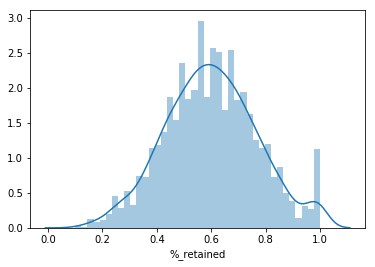

In [27]:
sns.distplot(dretained["%_retained"], bins=40)

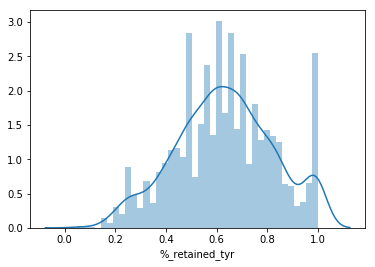

In [28]:
sns.distplot(dretained["%_retained_tyr"], bins=40)

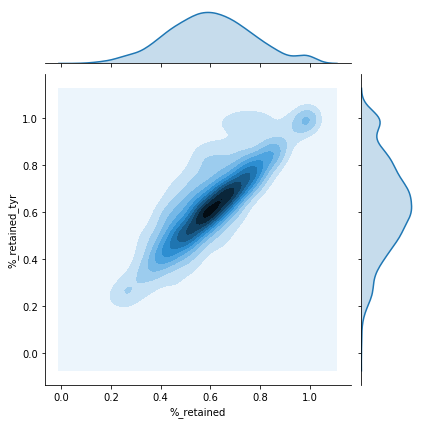

In [29]:
sns.jointplot("%_retained", "%_retained_tyr", dretained, kind='kde')

In [8]:
dstable = dretained.loc[dretained["%_retained_tyr"] >= 0.75]
dstable.shape

(775, 2)

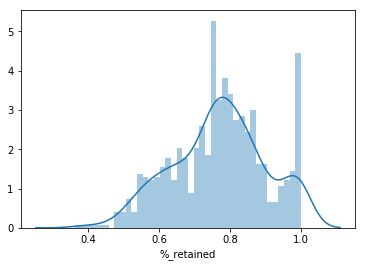

In [39]:
sns.distplot(dstable["%_retained"], bins=40)

In [40]:
dstable.sort_values(by=['%_retained_tyr'])

%_retained  %_retained_tyr
28__input_0029_0003_1_0002_0008          0.750000            0.75
13__input_0177_0004_4_0003_0002_0010     0.663636            0.75
34__input_0089_0003_1_0005_0005_0007     0.750000            0.75
48__input_0158_0004_4_0003_0006_0002     0.542857            0.75
27__input_0098_0005_1_0002_0009_0009     0.520000            0.75
48__input_0158_0004_4_0003_0006_0006     0.750000            0.75
13__input_0166_0005_5_0005_0003_0003     0.542857            0.75
34__input_0020_0003_7_0004_0010_0001     0.750000            0.75
27__input_0044_0004_6_0003_0009_0009     0.750000            0.75
29__input_0181_0004_1_0001_0004          0.540000            0.75
34__input_0020_0002_3_0004_0003_0007     0.857143            0.75
2__input_0102_0003_1_0005_0001_0004      0.750000            0.75
4__input_0097_0005_1_0004_0006_0004      0.750000            0.75
4__input_0182_0001_3_0004_0005_0003      0.866667            0.75
33__input_0063_0005_1_0004_0009_0001     0.750000            0.75
13__input_0135_0004_3_0002_0009_0001     0.614286            0.75
11__input_0191_0005_1_0005_0005_0002     0.750000            0.75
34__input_0020_0003_11_0004_0002_0009    0.700000            0.75
13__input_0177_0004_7_0005_0008_0008     0.750000            0.75
14__input_0056_0003_2_0004_0002_0003     0.750000            0.75
14__input_0188_0004_5_0002_0009_0004     0.700000            0.75
40__input_0182_0001_3_0001_0010_0010     0.750000            0.75
40__input_0108_0005_5_0005_0007_0006     0.700000            0.75
41__input_0008_0002_4_0004_0001          0.750000            0.75
26__input_0095_0001_5_0003_0005_0007     0.750000            0.75
41__input_0008_0002_5_0004_0006_0007     0.390909            0.75
41__input_0155_0001_5_0003               0.593333            0.75
1__input_0178_0004_2_0005_0007_0007      0.750000            0.75
1__input_0172_0001_1_0004_0002           0.487500            0.75
40__input_0108_0004_1_0001_0010_0008     0.750000            0.75
...                                           ...             ...
13__input_0166_0002_1_0003_0006_0006     1.000000            1.00
31__input_0119_0002_2_0002_0001_0005     0.976923            1.00
31__input_0119_0002_2_0002_0001_0006     0.985714            1.00
13__input_0157_0005_3_0003_0006_0010     0.788889            1.00
48__input_0034_0004_2_0003_0009          1.000000            1.00
4__input_0078_0002_1_0003_0008_0002      1.000000            1.00
46__input_0133_0003_1_0001_0010_0010     1.000000            1.00
43__input_0185_0005_3_0002_0004_0008     0.676923            1.00
20__input_0077_0004_1_0005_0005_0007     0.660000            1.00
41__input_0008_0002_4_0004_0001_0001     0.826667            1.00
41__input_0008_0002_4_0004_0001_0003     0.821429            1.00
41__input_0008_0002_4_0004_0001_0005     0.773333            1.00
20__input_0077_0004_1_0005_0005_0001     0.950000            1.00
20__input_0077_0004_1_0005_0005          0.677778            1.00
41__input_0008_0004_1_0004_0006_0001     0.625000            1.00
41__input_0008_0004_1_0004_0006_0004     1.000000            1.00
32__input_0133_0005_1_0003_0008_0002     1.000000            1.00
43__input_0185_0005_3_0002_0004_0010     1.000000            1.00
30__input_0014_0005_10_0004_0002_0008    0.812500            1.00
1__input_0029_0004_2_0005_0008_0002      0.625000            1.00
42__input_0194_0002_1_0002_0008_0003     0.771429            1.00
1__input_0029_0004_2_0005_0008           0.714286            1.00
42__input_0194_0002_1_0002_0008_0008     1.000000            1.00
42__input_0194_0002_1_0002_0008_0010     0.784615            1.00
42__input_0194_0002_1_0003_0008_0010     1.000000            1.00
33__input_0053_0004_2_0005_0007_0002     1.000000            1.00
43__input_0055_0003_1_0002_0001_0002     0.730769            1.00
43__input_0107_0004_1_0002_0008_0009     1.000000            1.00
1__input_0029_0004_2_0005_0008_0009      0.714286            1.00
1__input_0029

In [15]:
print(picked_list)

['0__input_0001_0002_1_0004_0001_0003', '0__input_0001_0002_1_0004_0001_0008', '0__input_0001_0004_1_0001_0007_0007', '0__input_0001_0004_2_0002_0001_0006', '0__input_0001_0004_5_0002_0002_0001', '0__input_0001_0004_5_0002_0002_0002', '0__input_0001_0004_5_0002_0002_0004', '0__input_0001_0004_5_0002_0002_0005', '0__input_0001_0004_5_0002_0002_0006', '0__input_0001_0004_5_0002_0002_0009', '0__input_0001_0004_5_0002_0002_0010', '0__input_0001_0005_4_0001_0001_0004', '0__input_0001_0005_4_0001_0001_0008', '0__input_0001_0005_4_0002_0002_0007', '0__input_0001_0005_4_0003_0002_0006', '10__input_0109_0002_3_0002_0001_0005', '10__input_0109_0002_4_0004_0009_0004', '10__input_0109_0003_1_0004_0001_0001', '10__input_0109_0003_3_0004_0008_0003', '11__input_0191_0001_2_0002_0010_0009', '11__input_0191_0001_2_0003_0004_0003', '11__input_0191_0001_2_0003_0004_0004', '11__input_0191_0001_2_0003_0004_0005', '11__input_0191_0001_2_0003_0004_0006', '11__input_0191_0001_2_0003_0004_0008', '11__input_019

In [21]:
picked_list = dstable.index.tolist()
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))

dscore_picked = dall_scores.loc[dall_scores["design"].isin(picked_list)]
print(dscore_picked)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0      SCORE:     -355.841        0.0 -600.411  129.353 -280.556   
1      SCORE:     -359.511        0.0 -606.109  130.257 -271.392   
2      SCORE:     -357.611        0.0 -602.064  131.898 -273.428   
3      SCORE:     -354.917        0.0 -602.839  131.617 -284.729   
4      SCORE:     -354.223        0.0 -599.131  132.668 -275.850   
5      SCORE:     -357.112        0.0 -602.081  133.103 -276.690   
6      SCORE:     -358.734        0.0 -599.376  132.134 -275.648   
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
8      SCORE:     -351.836        0.0 -597.921  131.746 -279.636   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
10     SCORE:     -352.999        0.0 -609.860  129.040 -274.937   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
12     SCORE:     -357.568        0.0 -603.953  121.503 -272.369   
13     SCORE:     -357.401        0.0 -619.184  

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


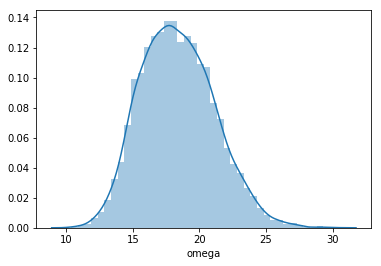

In [26]:
sns.distplot(dscore_picked["omega"], bins=40)

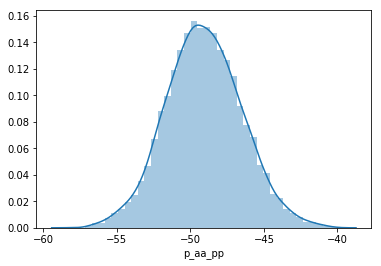

In [27]:
sns.distplot(dscore_picked["p_aa_pp"], bins=40)

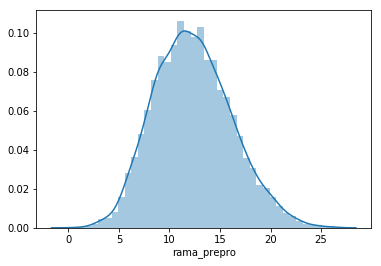

In [28]:
sns.distplot(dscore_picked["rama_prepro"], bins=40)

In [26]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
dscore_picked["%_retained"] = np.nan
dscore_picked["%_retained_tyr"] = np.nan

for design in picked_list:
#    print(dscore_picked.loc[dscore_picked["design"] == design])
    interactions = hbond_dict[design]
    interact_res = Counter([inter[0:2] for inter in interactions])
    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
    num_interactions = float(len(list(interact_res.elements())))
    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
    for pdb in glob.glob("round3_surf/" + design + "/" + design + "_*.pdb"):
        pdb_name = os.path.basename(pdb)
        pdb_name = os.path.splitext(pdb_name)[0]
        current_inter_list = []
        pose = py.pose_from_pdb(pdb)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for i in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
        current_inter = Counter(current_inter_list)
        num_curr_inter = 0.0
        num_curr_inter_tyr = 0.0
        for inter in current_inter:
            if inter in interact_res:
                if current_inter[inter] >= interact_res[inter]:
                    num_curr_inter += interact_res[inter]
                elif current_inter[inter] < interact_res[inter]:
                    num_curr_inter += current_inter[inter]
                    
            if inter in interact_res_tyr:
                if current_inter[inter] >= interact_res_tyr[inter]:
                    num_curr_inter_tyr += interact_res_tyr[inter]
                elif current_inter[inter] < interact_res_tyr[inter]:
                    num_curr_inter_tyr += current_inter[inter]
        dscore_picked["%_retained"].loc[dscore_picked["description"] == pdb_name ] = num_curr_inter/num_interactions
        dscore_picked["%_retained_tyr"].loc[dscore_picked["description"] == pdb_name ] = num_curr_inter_tyr/num_interactions_tyr
print(dscore_picked)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0      SCORE:     -355.841        0.0 -600.411  129.353 -280.556   
1      SCORE:     -359.511        0.0 -606.109  130.257 -271.392   
2      SCORE:     -357.611        0.0 -602.064  131.898 -273.428   
3      SCORE:     -354.917        0.0 -602.839  131.617 -284.729   
4      SCORE:     -354.223        0.0 -599.131  132.668 -275.850   
5      SCORE:     -357.112        0.0 -602.081  133.103 -276.690   
6      SCORE:     -358.734        0.0 -599.376  132.134 -275.648   
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
8      SCORE:     -351.836        0.0 -597.921  131.746 -279.636   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
10     SCORE:     -352.999        0.0 -609.860  129.040 -274.937   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
12     SCORE:     -357.568        0.0 -603.953  121.503 -272.369   
13     SCORE:     -357.401        0.0 -619.184  

In [27]:
dscore_picked.to_pickle('networks_selected_for_round4.pickle')

In [6]:
dscore_picked = pd.read_pickle('networks_selected_for_round4.pickle')
print(dscore_picked)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0      SCORE:     -355.841        0.0 -600.411  129.353 -280.556   
1      SCORE:     -359.511        0.0 -606.109  130.257 -271.392   
2      SCORE:     -357.611        0.0 -602.064  131.898 -273.428   
3      SCORE:     -354.917        0.0 -602.839  131.617 -284.729   
4      SCORE:     -354.223        0.0 -599.131  132.668 -275.850   
5      SCORE:     -357.112        0.0 -602.081  133.103 -276.690   
6      SCORE:     -358.734        0.0 -599.376  132.134 -275.648   
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
8      SCORE:     -351.836        0.0 -597.921  131.746 -279.636   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
10     SCORE:     -352.999        0.0 -609.860  129.040 -274.937   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
12     SCORE:     -357.568        0.0 -603.953  121.503 -272.369   
13     SCORE:     -357.401        0.0 -619.184  

In [12]:
dscore_picked.groupby(['design'], sort=False)['%_retained_tyr'].max()

design
20__input_0077_0004_1_0005_0005_0008     1.000000
40__input_0108_0004_2_0002_0008_0010     0.888889
40__input_0108_0004_1_0001_0010_0008     0.750000
13__input_0166_0002_7_0005_0005_0008     0.875000
27__input_0044_0004_6_0003_0009          0.777778
28__input_0038_0004_1_0001_0004_0007     1.000000
29__input_0181_0004_1_0001_0004          0.750000
6__input_0181_0005_1_0004_0005_0008      0.833333
42__input_0033_0003_4_0003_0004_0005     1.000000
40__input_0108_0004_1_0001_0010_0002     1.000000
40__input_0162_0004_2_0002_0007_0003     1.000000
5__input_0163_0001_8_0004_0009_0008      0.812500
30__input_0014_0003_1_0001_0006_0002     1.000000
13__input_0166_0005_1_0003_0003_0006     0.857143
0__input_0001_0005_4_0001_0001_0004      1.000000
5__input_0163_0005_3_0004_0009_0005      0.800000
13__input_0166_0003_4_0004_0004_0007     0.800000
27__input_0044_0004_5_0004_0005_0003     0.875000
32__input_0133_0005_2_0003_0006_0007     0.833333
27__input_0044_0004_5_0004_0005_0009     1.

In [7]:
idx = dscore_picked.groupby(['design'])['%_retained_tyr'].transform(max) == dscore_picked['%_retained_tyr']
df1 = dscore_picked[idx]
print(df1)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0      SCORE:     -355.841        0.0 -600.411  129.353 -280.556   
1      SCORE:     -359.511        0.0 -606.109  130.257 -271.392   
2      SCORE:     -357.611        0.0 -602.064  131.898 -273.428   
3      SCORE:     -354.917        0.0 -602.839  131.617 -284.729   
4      SCORE:     -354.223        0.0 -599.131  132.668 -275.850   
5      SCORE:     -357.112        0.0 -602.081  133.103 -276.690   
6      SCORE:     -358.734        0.0 -599.376  132.134 -275.648   
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
8      SCORE:     -351.836        0.0 -597.921  131.746 -279.636   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
13     SCORE:     -357.401        0.0 -619.184  127.383 -271.947   
15     SCORE:     -354.788        0.0 -605.549  123.006 -275.339   
16     SCORE:     -358.410        0.0 -610.367  

In [8]:
idx2 = df1.groupby(['design'])['%_retained'].transform(max) == df1['%_retained']
df2 = df1[idx2]
print(df2)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
9      SCORE:     -354.973        0.0 -606.283  124.887 -274.138   
11     SCORE:     -358.429        0.0 -605.645  126.348 -276.233   
15     SCORE:     -354.788        0.0 -605.549  123.006 -275.339   
18     SCORE:     -354.609        0.0 -602.043  122.124 -275.144   
50     SCORE:     -363.173        0.0 -628.940  133.648 -281.480   
51     SCORE:     -364.810        0.0 -626.813  133.535 -281.338   
52     SCORE:     -360.355        0.0 -629.162  138.609 -283.572   
53     SCORE:     -364.804        0.0 -629.492  135.572 -284.165   
54     SCORE:     -362.576        0.0 -623.085  138.775 -286.391   
55     SCORE:     -361.367        0.0 -631.776  141.726 -282.148   
56     SCORE:     -363.936        0.0 -624.395  138.061 -285.059   
57     SCORE:     -362.900        0.0 -627.126  135.800 -278.159   
58     SCORE:     -367.105        0.0 -628.524  

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


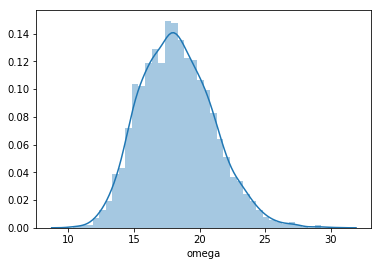

In [19]:
sns.distplot(df2["omega"], bins=40)

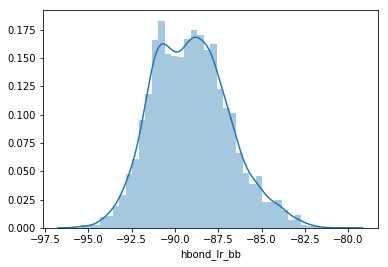

In [20]:
sns.distplot(df2["hbond_lr_bb"], bins=40)

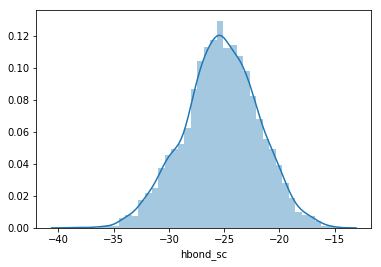

In [21]:
sns.distplot(df2["hbond_sc"], bins=40)

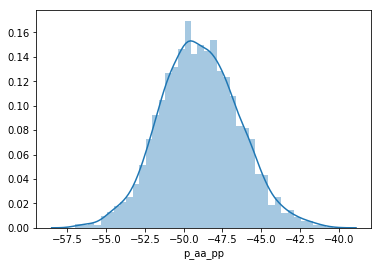

In [22]:
sns.distplot(df2["p_aa_pp"], bins=40)

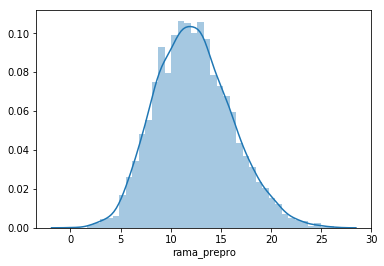

In [23]:
sns.distplot(df2["rama_prepro"], bins=40)

In [9]:
idx3 = df2.groupby(['design'])['omega'].transform(max) == df2['omega']
df3 = df2[idx3]
print(df3)

       SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  \
7      SCORE:     -352.627        0.0 -607.505  124.661 -280.013   
18     SCORE:     -354.609        0.0 -602.043  122.124 -275.144   
51     SCORE:     -364.810        0.0 -626.813  133.535 -281.338   
72     SCORE:     -350.814        0.0 -599.994  124.462 -295.369   
81     SCORE:     -359.624        0.0 -629.174  137.868 -268.866   
104    SCORE:     -349.884        0.0 -587.664  109.260 -249.455   
134    SCORE:     -345.495        0.0 -615.712  130.508 -264.570   
212    SCORE:     -359.176        0.0 -623.581  117.092 -272.116   
278    SCORE:     -356.351        0.0 -610.682  131.533 -271.183   
369    SCORE:     -363.088        0.0 -612.849  147.182 -276.751   
405    SCORE:     -348.594        0.0 -597.811  120.999 -267.446   
435    SCORE:     -340.614        0.0 -612.356  116.587 -261.480   
442    SCORE:     -364.570        0.0 -620.581  129.780 -282.982   
456    SCORE:     -346.094        0.0 -577.573  

In [10]:
len(df3.design.unique())

775

In [11]:
from shutil import copyfile

for index,row in df3.iterrows():
    pdb = row['description'] + ".pdb"
    source = "round3_surf/" + row['design'] + '/' + pdb
    target = "picked_from_round3/" + pdb
    copyfile(source, target)

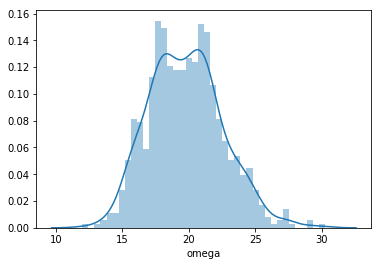

In [28]:
sns.distplot(df3["omega"], bins=40)

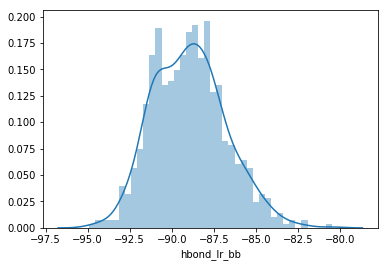

In [29]:
sns.distplot(df3["hbond_lr_bb"], bins=40)

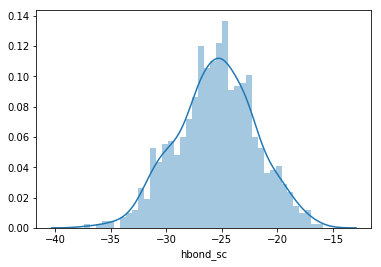

In [30]:
sns.distplot(df3["hbond_sc"], bins=40)

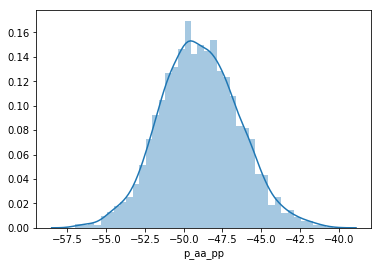

In [31]:
sns.distplot(df2["p_aa_pp"], bins=40)

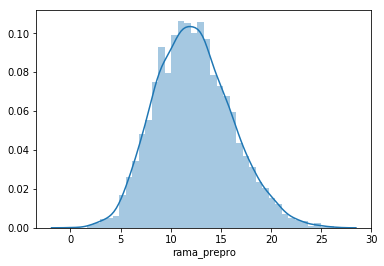

In [32]:
sns.distplot(df2["rama_prepro"], bins=40)